In [ ]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# **1. 데이터 확인**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

import os

In [ ]:
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

## **1-1. 데이터 불러오기**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2023년 K-water 대국민 물 빅데이터 분석과제 공모전/final/final.csv')

## **1-2. 데이터 구조 파악**
- 데이터의 전반적인 구조 파악

In [ ]:
# 상위 5개 데이터 확인

df.head()

,dam_nm,obsr_de,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,tot_qy,valid_qy,unused_qy,maximum_use_qy,avg_hmd,avg_tmr,avg_wv,sun_sum
0,군위,2021-09-01,61.1076,33.593,27.709,38.444,0.789,48.7,40.1,5.5,40.1,0.908,21.9,2.4,0.2
1,군위,2021-09-02,0.2366,16.142,49.042,35.601,0.731,48.7,40.1,5.5,40.1,0.771,21.8,2.5,0.9
2,군위,2021-09-03,0.0000,2.402,30.330,33.188,0.682,48.7,40.1,5.5,40.1,0.865,20.5,1.4,0.7
3,군위,2021-09-04,0.0000,2.656,1.407,33.296,0.684,48.7,40.1,5.5,40.1,0.664,22.4,2.0,7.7
4,군위,2021-09-05,0.0000,1.492,1.492,33.296,0.684,48.7,40.1,5.5,40.1,0.685,21.8,1.7,1.0


In [ ]:
# 데이터 정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30681 entries, 0 to 30680
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dam_nm          30681 non-null  object 
 1   obsr_de         30681 non-null  object 
 2   rain_qy         30681 non-null  float64
 3   inflow_qy       30681 non-null  float64
 4   outflow_qy      30681 non-null  float64
 5   reserve_qy      30681 non-null  float64
 6   reserve_rt      30681 non-null  float64
 7   tot_qy          30681 non-null  float64
 8   valid_qy        30681 non-null  float64
 9   unused_qy       30681 non-null  float64
 10  maximum_use_qy  30681 non-null  float64
 11  avg_hmd         30681 non-null  float64
 12  avg_tmr         30681 non-null  float64
 13  avg_wv          30681 non-null  float64
 14  sun_sum         30681 non-null  float64
dtypes: float64(13), object(2)
memory usage: 3.5+ MB


- 총 15개의 변수(= column)을 가지고 있음
- 회귀 모델링 시 필요한 변수
  - feature: dam_nm, obsr_de(-> 연도, 계절), rain_qy, inflow_qy, outflow_qy, avg_hmd, avg_tmr, avg_wv, sun_sum
  - target: reserve_qy
- 결측치는 존재하지 않음을 확인할 수 있음
- 데이터형 또한 대부분 적절히 설정되었음을 확인할 수 있음
  - obsr_de의 경우에만 datetime형으로 변경

In [ ]:
### 데이터형 변경
# obsr_de(관측일자): object -> datetime

df['obsr_de'] = df['obsr_de'].apply(lambda x: pd.to_datetime(x, format = '%Y-%m-%d',errors = 'coerce')) # 결측치나 변경할 수 없는 값이 있다면 일단 모두 무시하고 데이터형 변경

In [ ]:
# 데이터 정보 재확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30681 entries, 0 to 30680
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   dam_nm          30681 non-null  object        
 1   obsr_de         30681 non-null  datetime64[ns]
 2   rain_qy         30681 non-null  float64       
 3   inflow_qy       30681 non-null  float64       
 4   outflow_qy      30681 non-null  float64       
 5   reserve_qy      30681 non-null  float64       
 6   reserve_rt      30681 non-null  float64       
 7   tot_qy          30681 non-null  float64       
 8   valid_qy        30681 non-null  float64       
 9   unused_qy       30681 non-null  float64       
 10  maximum_use_qy  30681 non-null  float64       
 11  avg_hmd         30681 non-null  float64       
 12  avg_tmr         30681 non-null  float64       
 13  avg_wv          30681 non-null  float64       
 14  sun_sum         30681 non-null  float64       
dtypes:

In [ ]:
# 요약통계량 확인

df.describe()

,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,tot_qy,valid_qy,unused_qy,maximum_use_qy,avg_hmd,avg_tmr,avg_wv,sun_sum
count,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000
mean,3.542968,24.288367,25.170842,362.762394,0.573020,615.381429,436.665714,115.885714,433.743400,0.687424,13.039255,1.567154,8.717351
std,12.517330,130.025424,105.715355,493.718980,0.167671,820.263423,530.053539,195.865907,527.328374,0.151160,9.645208,0.979103,5.699079
min,0.000000,0.000000,0.000000,0.003000,0.000000,22.110000,17.880000,0.800000,17.820000,0.008000,-16.000000,0.020000,0.080000
25%,0.000000,0.469000,1.596000,39.345000,0.464000,73.600000,69.800000,5.900000,69.800000,0.584000,5.100000,0.900000,5.000000
50%,0.000000,2.877000,6.812000,135.101000,0.584000,250.000000,210.000000,12.000000,210.000000,0.706000,13.200000,1.300000,8.200000
75%,0.491400,12.856000,18.683000,466.956000,0.692000,790.000000,560.000000,124.000000,560.000000,0.800000,21.600000,1.900000,11.100000
max,334.630500,5457.957000,5027.616000,2416.721000,0.989000,2900.000000,1900.000000,650.000000,1900.000000,1.000000,31.600000,10.000000,40.000000


- 대부분의 변수들이 **왜곡된** 분포를 가짐을 확인할 수 있다.
- 데이터에 **이상치**가 존재함을 짐작할 수 있다.
- 변수들 간의 **스케일 차이**가 존재함을 확인할 수 있다.

## **1-3. 데이터 분리(train/test split)**

In [ ]:
from sklearn.model_selection import train_test_split

# 댐별로 데이터를 그룹화하여 데이터프레임으로 저장
group_dam = df.groupby('dam_nm')

# 각 댐 그룹별로 train/test split을 수행하여 리스트에 저장
train_data_list = []
test_data_list = []

for dam, group in group_dam:
  train_data, test_data = train_test_split(group, test_size = 0.2, random_state = 42, shuffle = True)
  train_data_list.append(train_data)
  test_data_list.append(test_data)

# train_data_list와 test_data_list를 이용하여 전체 train/test 데이터셋 생성
df_train = pd.concat(train_data_list)
df_test = pd.concat(test_data_list)

In [ ]:
print(len(df_train), len(df_test))

24528 6153


# **2. EDA(Explanatory Data Analysis)**
- 댐별로 여러 특징을 파악해보자.
- **train** 데이터에 대해서만 수행

## **2-1. Target 변수(reserve_qy)**

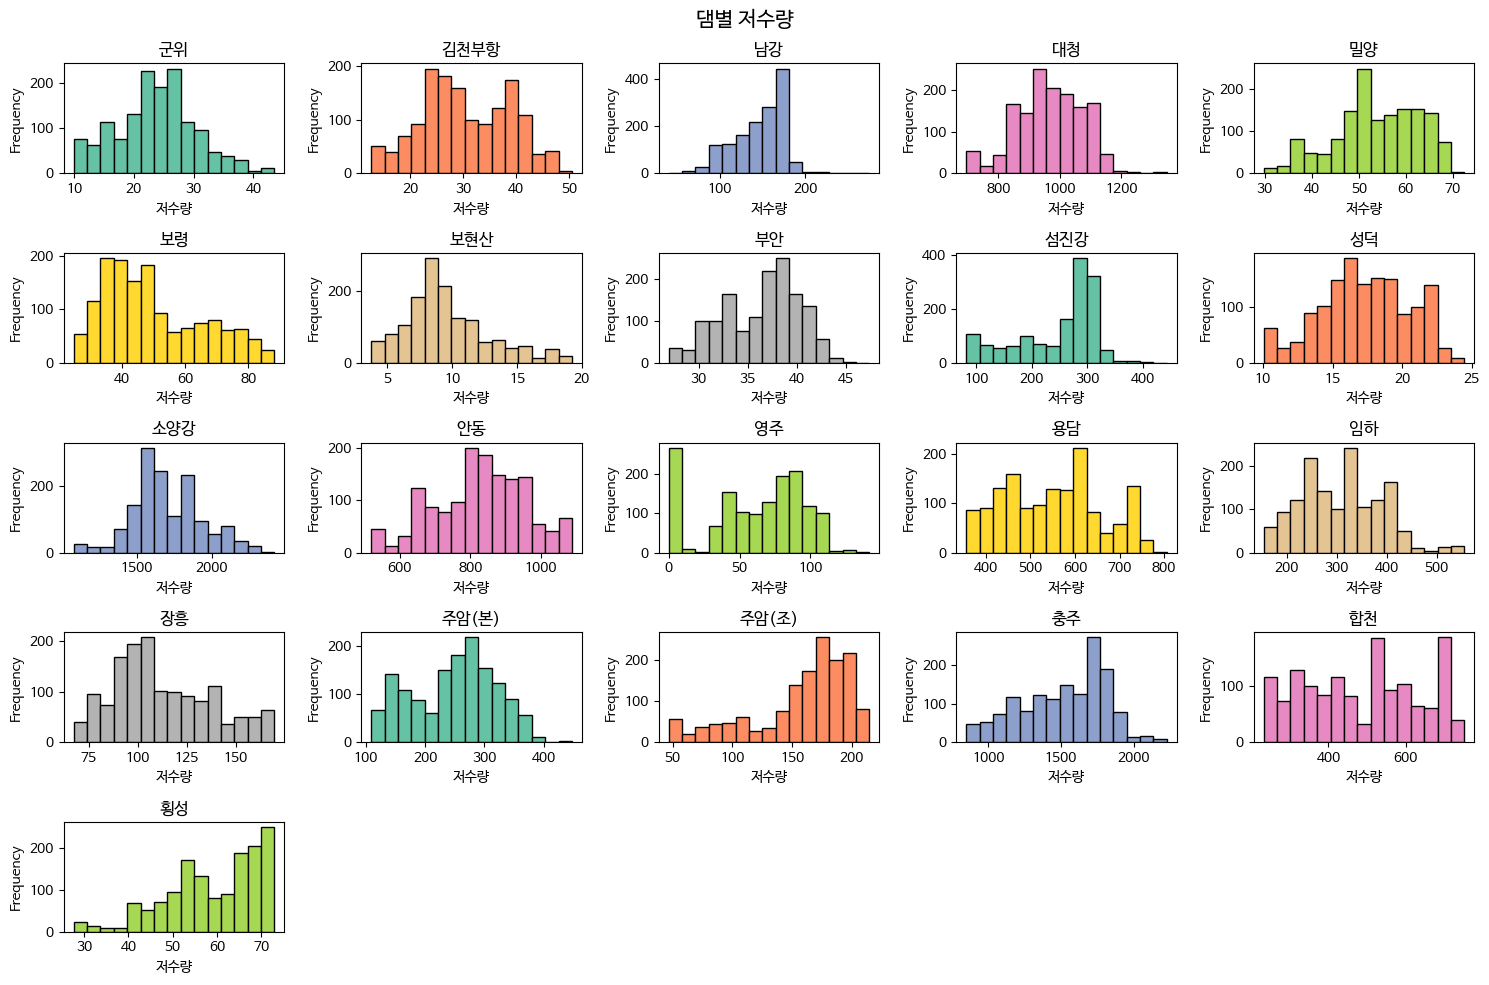

In [ ]:
### 댐별 저수량 분포

# 서브플롯 배치 설정
nrows = 5
ncols = 5
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10), sharex=False)

# 컬러맵 설정
colors = sns.color_palette("Set2", len(group_dam))

# 각 댐별로 강우량의 히스토그램 시각화
for (name, data), ax, color in zip(group_dam, axes.flatten(), colors):
    data['reserve_qy'].plot.hist(ax=ax, bins=15, edgecolor='black', color=color)
    ax.set(title=name, xlabel='저수량', ylabel='Frequency')

# 남는 subplot 축 제거
for i in range(len(group_dam), nrows * ncols):
  axes.flatten()[i].remove()

# 전체 그래프 타이틀
plt.suptitle('댐별 저수량', fontsize=15)

# 서브플롯 레이아웃 조정
plt.tight_layout()

plt.show()

In [ ]:
### 왜도

skew_water = group_dam['reserve_qy'].skew().reset_index()
skew_water.rename(columns = {'reserve_qy': 'skewness'}, inplace = True)

print(skew_water)

   dam_nm  skewness
0      군위  0.097725
1    김천부항  0.040888
2      남강 -0.457902
3      대청 -0.205169
4      밀양 -0.377683
5      보령  0.625995
6     보현산  0.781353
7      부안 -0.373665
8     섬진강 -0.853302
9      성덕 -0.179790
10    소양강  0.249418
11     안동 -0.225902
12     영주 -0.453300
13     용담  0.128656
14     임하  0.281295
15     장흥  0.520894
16  주암(본) -0.170698
17  주암(조) -1.107758
18     충주 -0.401608
19     합천  0.003190
20     횡성 -0.716848


In [ ]:
# 기술통계량 확인

group_dam['reserve_qy'].describe()

,count,mean,std,min,25%,50%,75%,max
dam_nm,,,,,,,,
군위,1461.0,23.667848,6.636155,9.9452,19.4320,23.7470,27.6450,43.5280
김천부항,1461.0,30.415445,8.338396,12.6696,24.6610,29.0450,37.8360,50.5150
남강,1461.0,147.178569,30.382370,40.1670,128.6630,154.2361,170.7480,275.4330
대청,1461.0,968.000891,105.865175,695.8642,899.5296,970.3704,1048.0533,1347.5580
밀양,1461.0,53.810147,8.961002,29.7529,48.7520,53.7670,61.0921,72.4410
보령,1461.0,49.853827,15.538785,24.6489,37.3710,46.3582,61.6090,88.2190
보현산,1461.0,9.618047,3.261966,3.7410,7.5747,8.9495,11.2228,19.2320
부안,1461.0,36.444627,3.856565,26.9600,33.3510,37.2760,39.2660,47.4020
섬진강,1461.0,247.071321,73.361410,81.4090,194.3835,276.1445,299.5449,443.9330


- 대부분의 댐에서 거의 일정하게 유지되고 있음을 확인할 수 있다.
- 각 댐별 저수량의 스케일 차이가 심함을 확인할 수 있다.

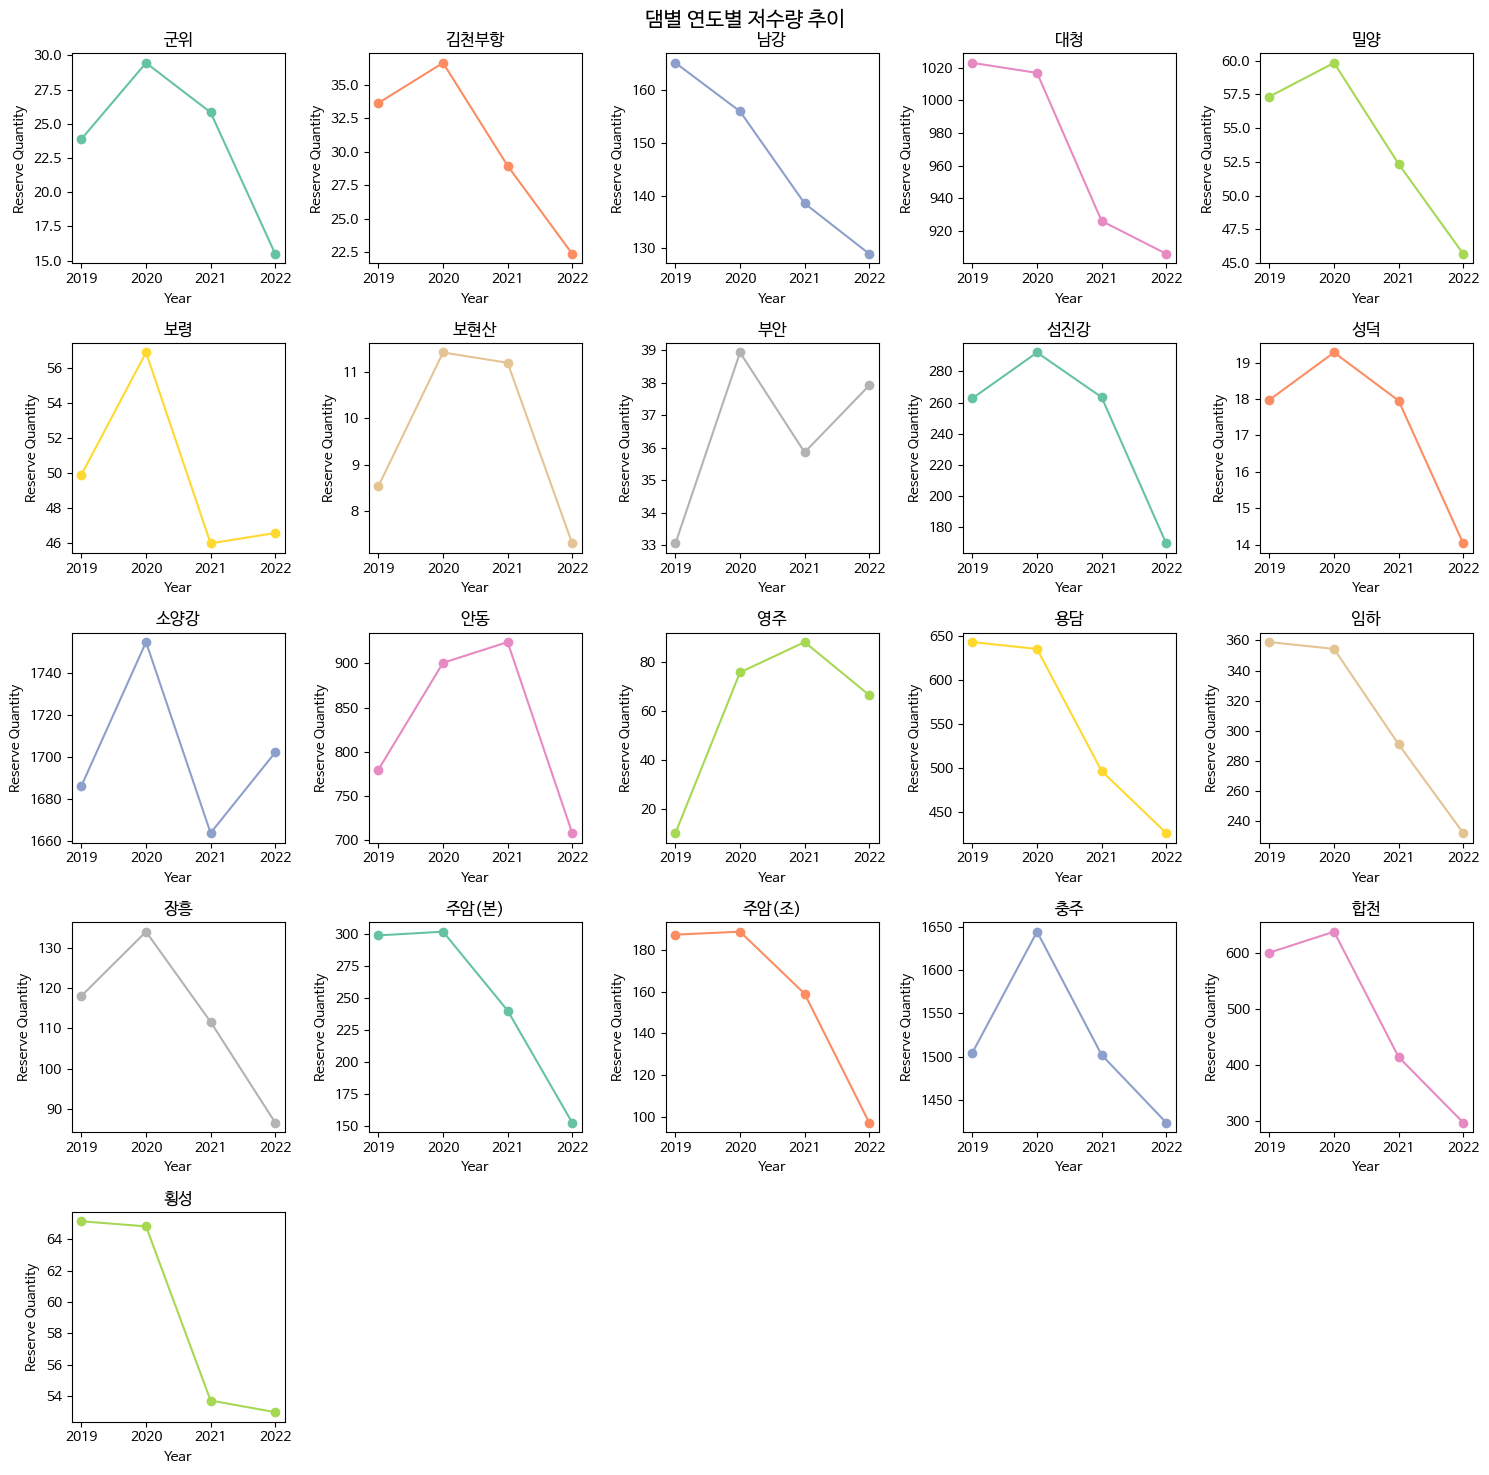

In [ ]:
### 연도별 저수량 추이 분석

# 컬러맵 설정
colors = sns.color_palette("Set2", len(group_dam))

# 댐별로 연도별 저수량 추이 시각화
nrows = 5
ncols = 5
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 15))

for (name, data), ax, color in zip(group_dam, axes.flatten(), colors):
    grouped_data = data.groupby(data['obsr_de'].dt.year)['reserve_qy'].mean().reset_index()
    ax.plot(grouped_data['obsr_de'], grouped_data['reserve_qy'], marker='o', color=color)
    ax.set_title(name)
    ax.set_xlabel('Year')
    ax.set_ylabel('Reserve Quantity')

# 남는 subplot 축 제거
for i in range(len(group_dam), nrows * ncols):
    axes.flatten()[i].remove()

# 전체 그래프 타이틀
plt.suptitle('댐별 연도별 저수량 추이', fontsize=15)

# 서브플롯 레이아웃 조정
plt.tight_layout()
plt.show()

In [ ]:
# 월별 데이터를 계절별 데이터로 변환하는 함수
def get_season(x):
    if x in [3, 4, 5]:
        return 'spring'
    elif x in [6, 7, 8]:
        return 'summer'
    elif x in [9, 10, 11]:
        return 'autumn'
    else:
        return 'winter'

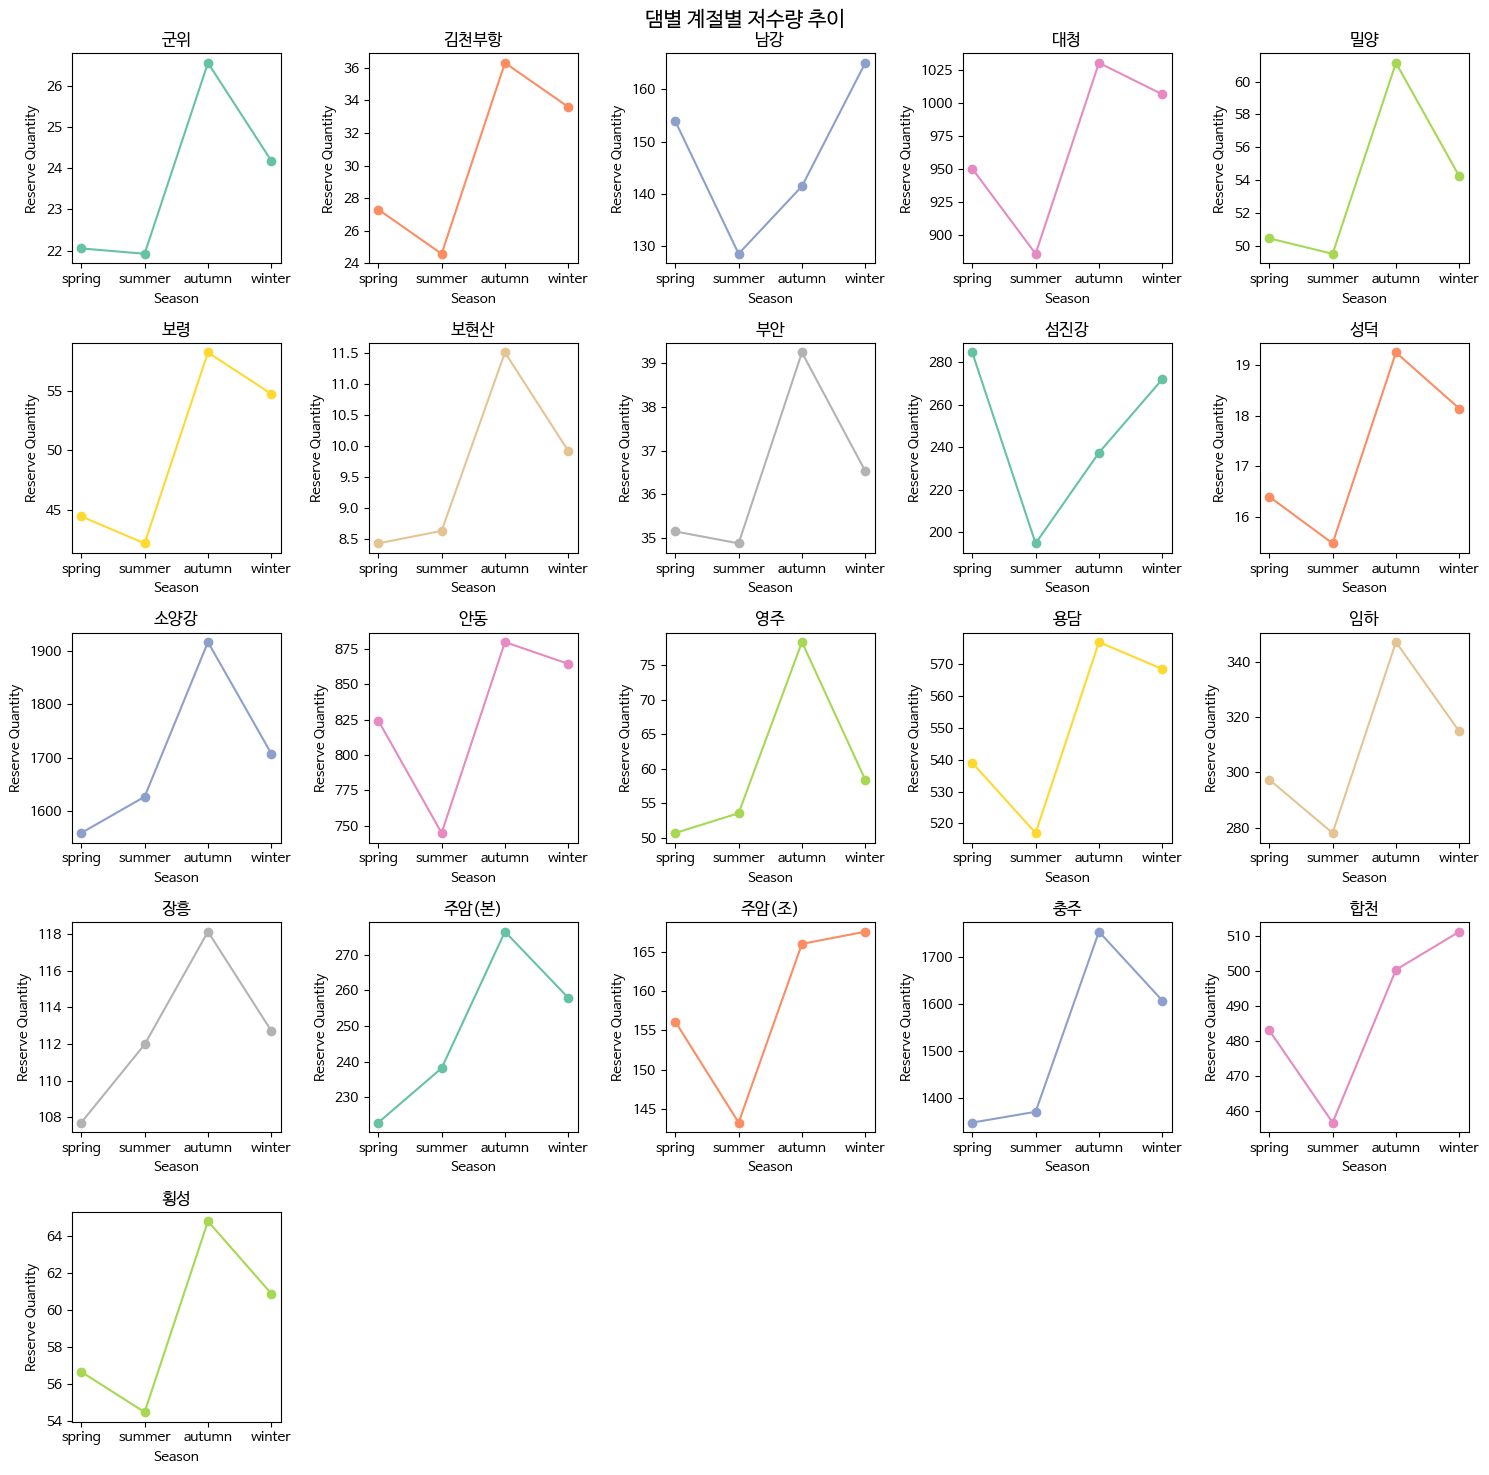

In [ ]:
### 계절별 저수량 추이 분석

# 컬러맵 설정
colors = sns.color_palette("Set2", len(group_dam))

# 댐별로 계절별 저수량 추이 시각화
nrows = 5
ncols = 5
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 15))

for (name, data), ax, color in zip(group_dam, axes.flatten(), colors):
    grouped_data = data.groupby(data['obsr_de'].dt.month.apply(get_season))['reserve_qy'].mean().reset_index()
    # 계절 순서 변경
    season_order = ['spring', 'summer', 'autumn', 'winter']
    grouped_data['obsr_de'] = pd.Categorical(grouped_data['obsr_de'], categories=season_order, ordered=True)
    grouped_data = grouped_data.sort_values('obsr_de')

    ax.plot(grouped_data['obsr_de'], grouped_data['reserve_qy'], marker='o', color=color)
    ax.set_title(name)
    ax.set_xlabel('Season')
    ax.set_ylabel('Reserve Quantity')

# 남는 subplot 축 제거
for i in range(len(group_dam), nrows * ncols):
    axes.flatten()[i].remove()

# 전체 그래프 타이틀
plt.suptitle('댐별 계절별 저수량 추이', fontsize=15)

# 서브플롯 레이아웃 조정
plt.tight_layout()
plt.show()

- 연도별로, 계절별로, 댐별로 다른 양상을 보인다.
  - 연도, 계절을 변수로 추가

In [ ]:
# 연도 변수 추가
df_train['year'] = df_train['obsr_de'].dt.year
df_test['year'] = df_test['obsr_de'].dt.year

# 계절 변수 추가
df_train['season'] = df_train['obsr_de'].dt.month.apply(get_season)
df_test['season'] = df_test['obsr_de'].dt.month.apply(get_season)

# 다시 groupby 실행
group_dam = df_train.groupby('dam_nm')

## **2-2. Feature 변수들**

### **2-2-1. 강우량(rain_qy)**

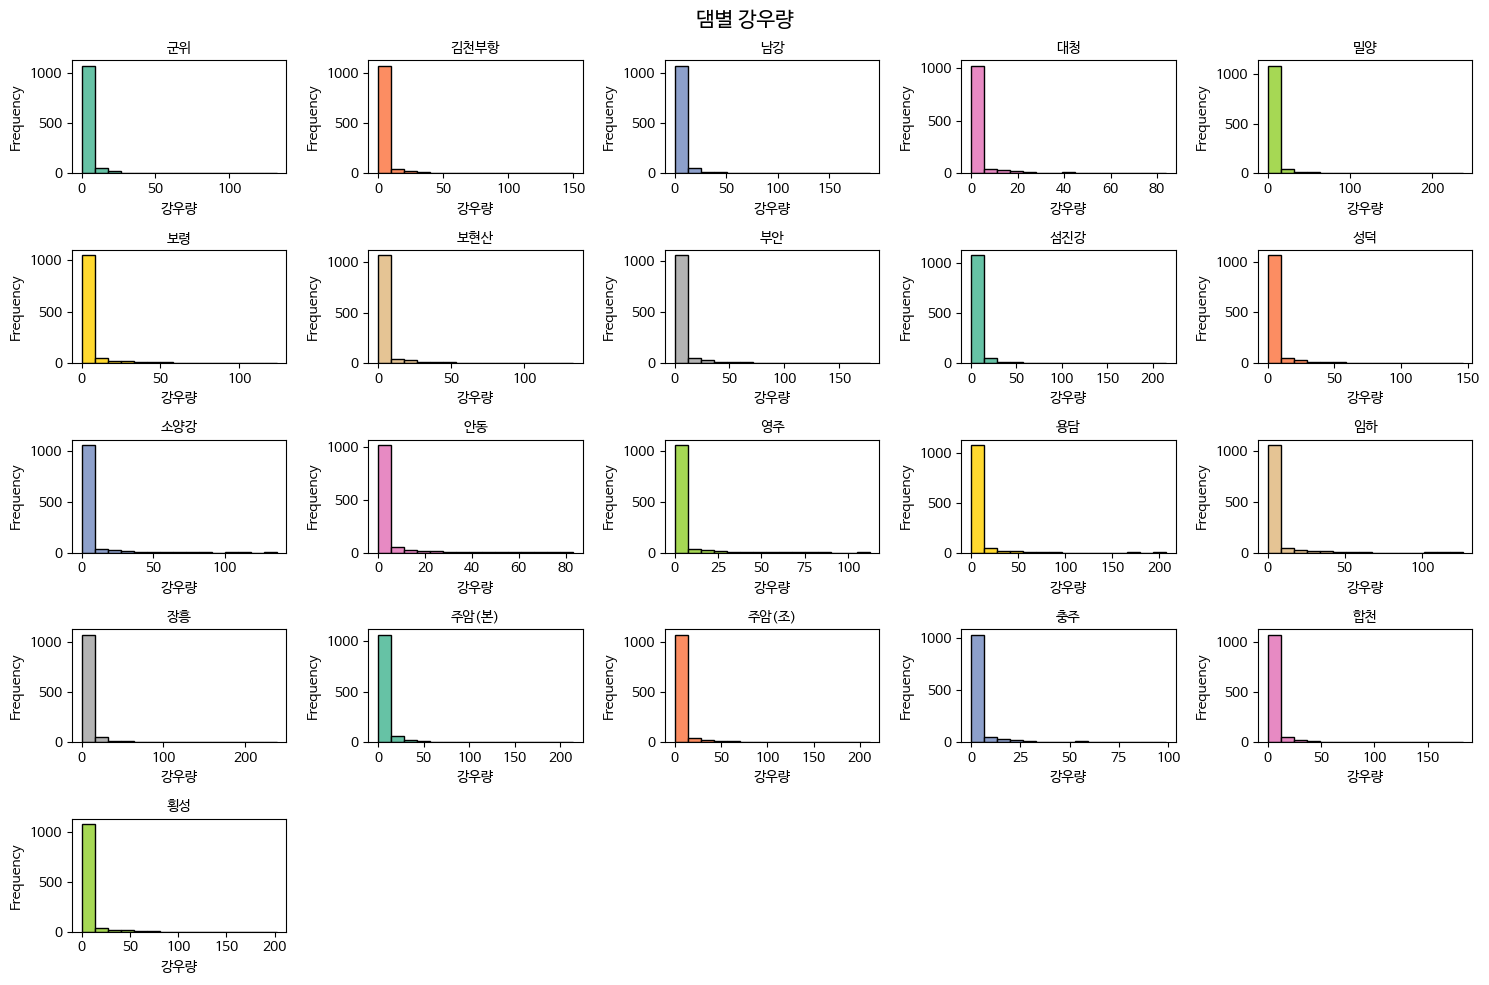

In [ ]:
### 댐별 강우량 분포

# 서브플롯 배치 설정
nrows = 5
ncols = 5
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10))

# 컬러맵 설정
colors = sns.color_palette("Set2", len(group_dam))

# 각 댐별로 강우량의 히스토그램 시각화
for (name, data), ax, color in zip(group_dam, axes.flatten(), colors):
  data['rain_qy'].plot.hist(ax=ax, bins=15, edgecolor='black', color=color)
  ax.set_title(name, fontsize=10)
  ax.set_xlabel('강우량')
  ax.set_ylabel('Frequency')

# 남는 subplot 축 제거
for i in range(len(group_dam), nrows * ncols):
  axes.flatten()[i].remove()

# 전체 그래프 타이틀
plt.suptitle('댐별 강우량', fontsize=15)

# 서브플롯 레이아웃 조정
plt.tight_layout()

plt.show()

In [ ]:
### 왜도

skew_rain = group_dam['rain_qy'].skew().reset_index()
skew_rain.rename(columns = {'rain_qy': 'skewness'}, inplace = True)

print(skew_rain)

   dam_nm  skewness
0      군위  6.634453
1    김천부항  6.357309
2      남강  7.293200
3      대청  4.635984
4      밀양  8.113748
5      보령  5.398581
6     보현산  6.482285
7      부안  6.808217
8     섬진강  8.031043
9      성덕  6.858361
10    소양강  5.657814
11     안동  4.881469
12     영주  5.244786
13     용담  7.803187
14     임하  6.699256
15     장흥  7.888822
16  주암(본)  8.078620
17  주암(조)  7.535884
18     충주  4.989792
19     합천  7.465515
20     횡성  7.186147


In [ ]:
# 기술통계량 확인

group_dam['rain_qy'].describe()

,count,mean,std,min,25%,50%,75%,max
dam_nm,,,,,,,,
군위,1168.0,2.487824,9.153009,0.0,0.0,0.0000,0.000000,132.1078
김천부항,1168.0,3.474872,12.680369,0.0,0.0,0.0000,0.423700,149.8170
남강,1168.0,3.839315,13.814371,0.0,0.0,0.0000,0.654275,189.3882
대청,1168.0,3.089242,9.405697,0.0,0.0,0.0000,0.578000,83.9241
밀양,1168.0,4.136787,16.854753,0.0,0.0,0.0000,0.242000,237.1764
보령,1168.0,3.548574,11.927246,0.0,0.0,0.0000,0.611500,123.7935
보현산,1168.0,2.557796,9.522202,0.0,0.0,0.0000,0.000000,133.5873
부안,1168.0,3.708783,12.909738,0.0,0.0,0.0000,0.656100,177.6204
섬진강,1168.0,3.503919,12.298119,0.0,0.0,0.0000,0.857250,214.8620


- 강우량은 댐마다 차이가 있음을 확인할 수 있다.
- 강우량은 대체로 굉장히 왜곡된 분포를 가지고 있다. (왜도가 1 이상)

### **2-2-2. 유입량(inflow_qy)**

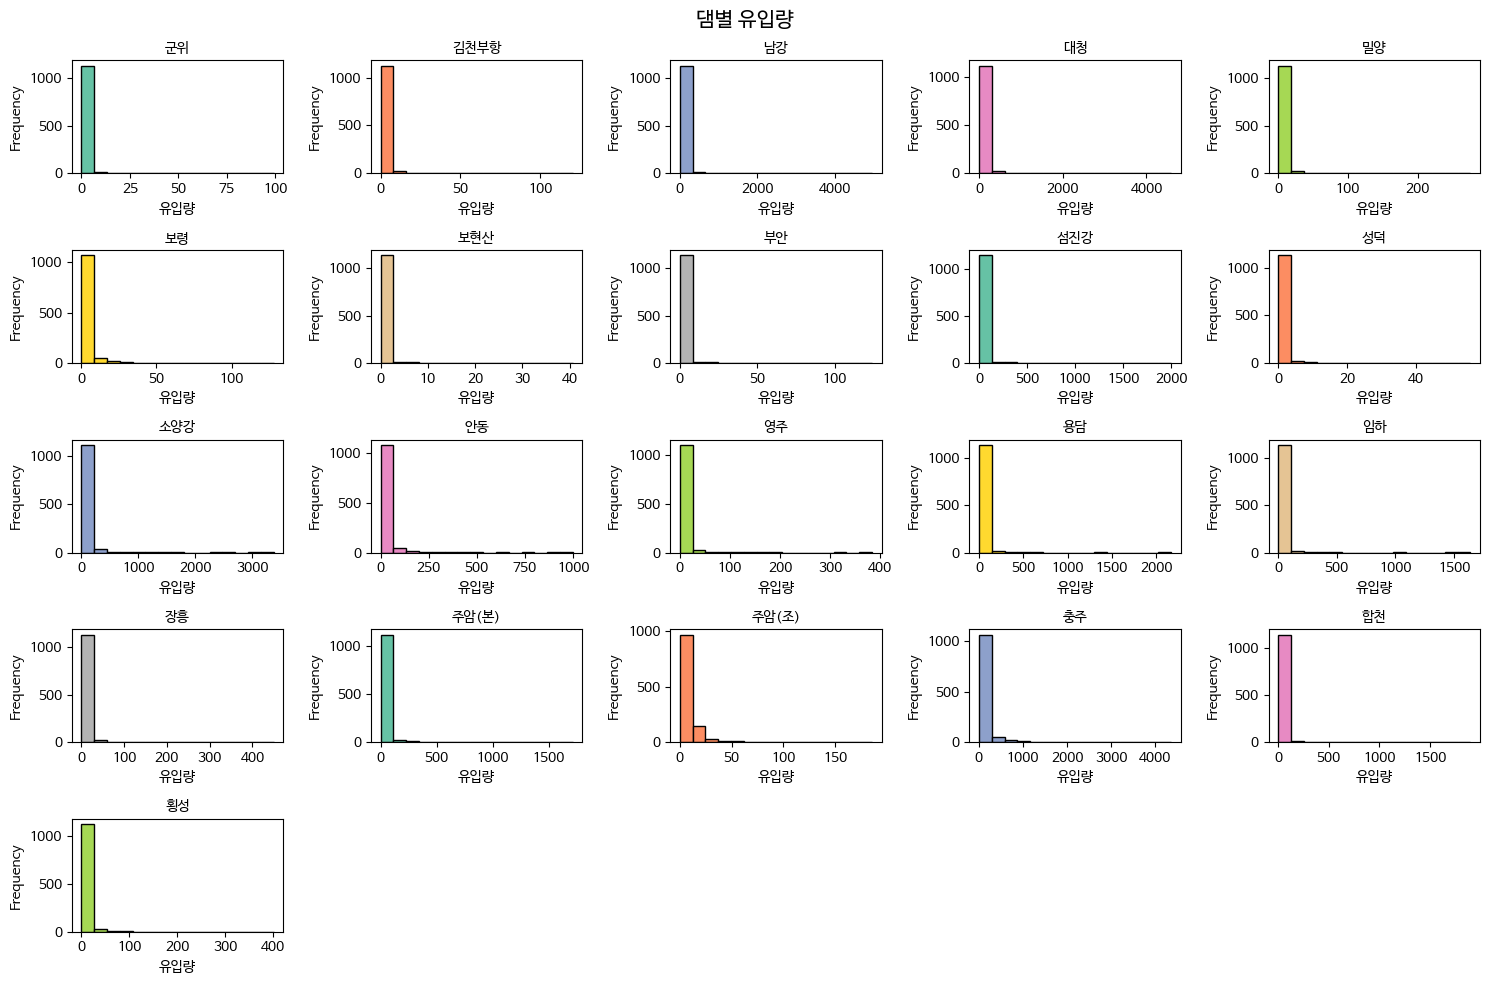

In [ ]:
### 댐별 유입량 분포

# 서브플롯 배치 설정
nrows = 5
ncols = 5
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10))

# 컬러맵 설정
colors = sns.color_palette("Set2", len(group_dam))

# 각 댐별로 유입량의 히스토그램 시각화
for (name, data), ax, color in zip(group_dam, axes.flatten(), colors):
    data['inflow_qy'].plot.hist(ax=ax, bins=15, edgecolor='black', color=color)
    ax.set_title(name, fontsize=10)
    ax.set_xlabel('유입량')
    ax.set_ylabel('Frequency')

# 남는 subplot 축 제거
for i in range(len(group_dam), nrows * ncols):
    axes.flatten()[i].remove()

# 전체 그래프 타이틀
plt.suptitle('댐별 유입량', fontsize=15)

# 서브플롯 레이아웃 조정
plt.tight_layout()

plt.show()

In [ ]:
# 댐별 유입량의 왜도 측정

skew_in = group_dam['inflow_qy'].skew().reset_index()
skew_in.rename(columns = {'inflow_qy': 'skewness'}, inplace = True)

print(skew_in)

   dam_nm   skewness
0      군위  10.867257
1    김천부항  10.115397
2      남강  12.351243
3      대청  10.462004
4      밀양  12.535195
5      보령   7.294968
6     보현산  12.042990
7      부안  12.015118
8     섬진강  16.874522
9      성덕  10.988168
10    소양강   9.759704
11     안동   7.718728
12     영주   8.795604
13     용담  14.794272
14     임하  14.315135
15     장흥  14.700274
16  주암(본)  11.445996
17  주암(조)   7.631376
18     충주   6.744384
19     합천  14.362126
20     횡성  13.447699


- 유입량은 댐별로 스케일 차이가 매우 심함을 확인할 수 있다.
- 유입량은 대체로 굉장히 왜곡된 분포를 가지고 있다. (왜도가 1 이상)

In [ ]:
# 기술통계량 확인

group_dam['inflow_qy'].describe()

,count,mean,std,min,25%,50%,75%,max
dam_nm,,,,,,,,
군위,1168.0,1.146100,5.540482,0.000,0.05575,0.1510,0.45800,99.184
김천부항,1168.0,1.841100,6.462229,0.000,0.31275,0.5330,1.08100,120.444
남강,1168.0,61.615610,227.088387,0.574,12.59175,19.8600,36.51600,4947.819
대청,1168.0,75.040250,261.237934,0.000,15.61025,23.3000,42.27625,4590.323
밀양,1168.0,3.117076,15.733253,0.000,0.17875,0.5170,1.40500,275.272
보령,1168.0,3.873482,10.365378,0.000,0.69875,1.3910,2.89900,128.037
보현산,1168.0,0.422547,2.056748,0.000,0.02100,0.0745,0.17900,40.664
부안,1168.0,1.387781,6.206269,0.000,0.05800,0.2390,0.71450,123.991
섬진강,1168.0,16.970652,77.481299,0.000,2.05650,4.2935,9.24050,2000.971


### **2-2-3. 방류량(outflow_qy)**

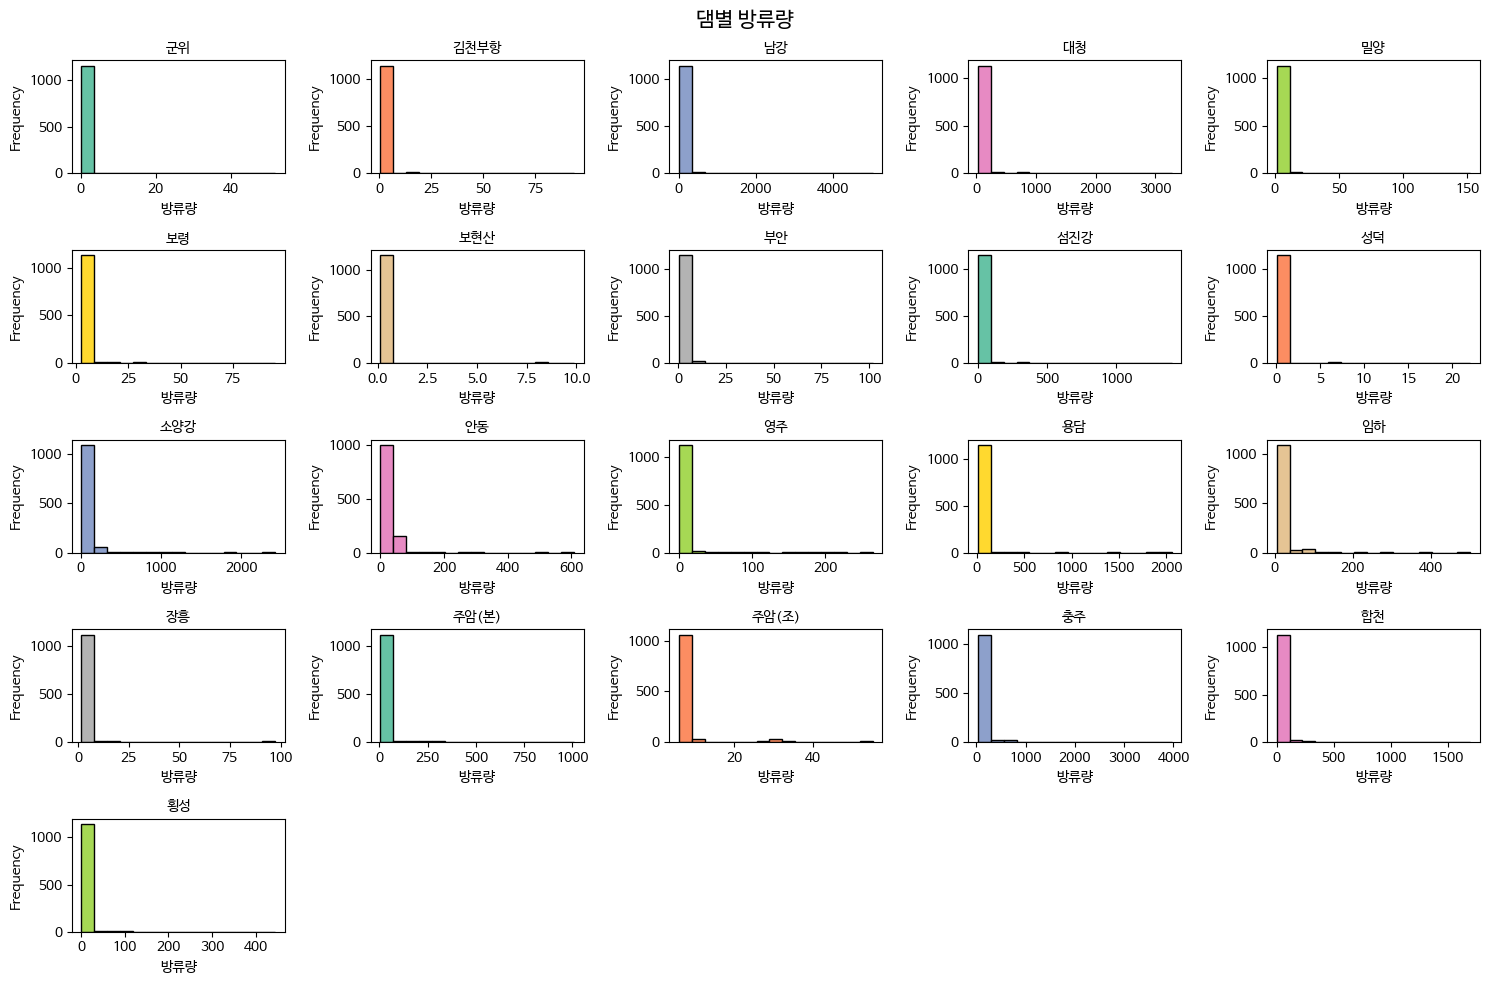

In [ ]:
### 댐별 방류량 분포

# 서브플롯 배치 설정
nrows = 5
ncols = 5
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10))

# 컬러맵 설정
colors = sns.color_palette("Set2", len(group_dam))

# 각 댐별로 방류량의 히스토그램 시각화
for (name, data), ax, color in zip(group_dam, axes.flatten(), colors):
    data['outflow_qy'].plot.hist(ax=ax, bins=15, edgecolor='black', color=color)
    ax.set_title(name, fontsize=10)
    ax.set_xlabel('방류량')
    ax.set_ylabel('Frequency')

# 남는 subplot 축 제거
for i in range(len(group_dam), nrows * ncols):
    axes.flatten()[i].remove()

# 전체 그래프 타이틀
plt.suptitle('댐별 방류량', fontsize=15)

# 서브플롯 레이아웃 조정
plt.tight_layout()

plt.show()

In [ ]:
### 왜도

skew_out = group_dam['outflow_qy'].skew().reset_index()
skew_out.rename(columns = {'outflow_qy': 'skewness'}, inplace = True)

print(skew_out)

   dam_nm   skewness
0      군위  11.417364
1    김천부항  12.245549
2      남강  13.692124
3      대청   9.291428
4      밀양  11.014370
5      보령   8.620210
6     보현산  11.154366
7      부안  14.409461
8     섬진강  16.001156
9      성덕  10.233665
10    소양강   9.877347
11     안동   9.201306
12     영주   8.028915
13     용담  15.980159
14     임하   9.242859
15     장흥   6.620325
16  주암(본)   8.117025
17  주암(조)   4.336629
18     충주   7.700438
19     합천  15.259417
20     횡성  15.807526


- 방류량은 댐별로 스케일 차이가 매우 심함을 확인할 수 있다.
- 방류량은 대체로 굉장히 왜곡된 분포를 가지고 있다. (왜도가 1 이상)

In [ ]:
# 기술통계량 확인

group_dam['outflow_qy'].describe()

,count,mean,std,min,25%,50%,75%,max
dam_nm,,,,,,,,
군위,1168.0,1.287889,3.409646,0.210,0.74300,0.8990,1.35625,51.924
김천부항,1168.0,2.070639,4.864198,0.587,1.20775,1.6275,1.73025,93.570
남강,1168.0,63.366041,215.218869,5.779,10.78375,22.7385,43.44125,5027.616
대청,1168.0,79.062738,232.604086,24.240,30.93075,32.6120,51.85950,3274.129
밀양,1168.0,3.298511,9.724030,1.403,1.60100,1.6830,2.67400,152.553
보령,1168.0,4.301669,7.058612,2.653,3.07550,3.2415,3.55600,95.181
보현산,1168.0,0.451210,0.678725,0.123,0.33800,0.3620,0.46800,9.874
부안,1168.0,1.410304,4.530691,0.569,0.67600,0.7350,0.86875,101.811
섬진강,1168.0,19.539920,63.517451,0.811,4.51650,6.3355,27.60425,1396.983


### **2-2-4. 평균습도(avg_hmd)**

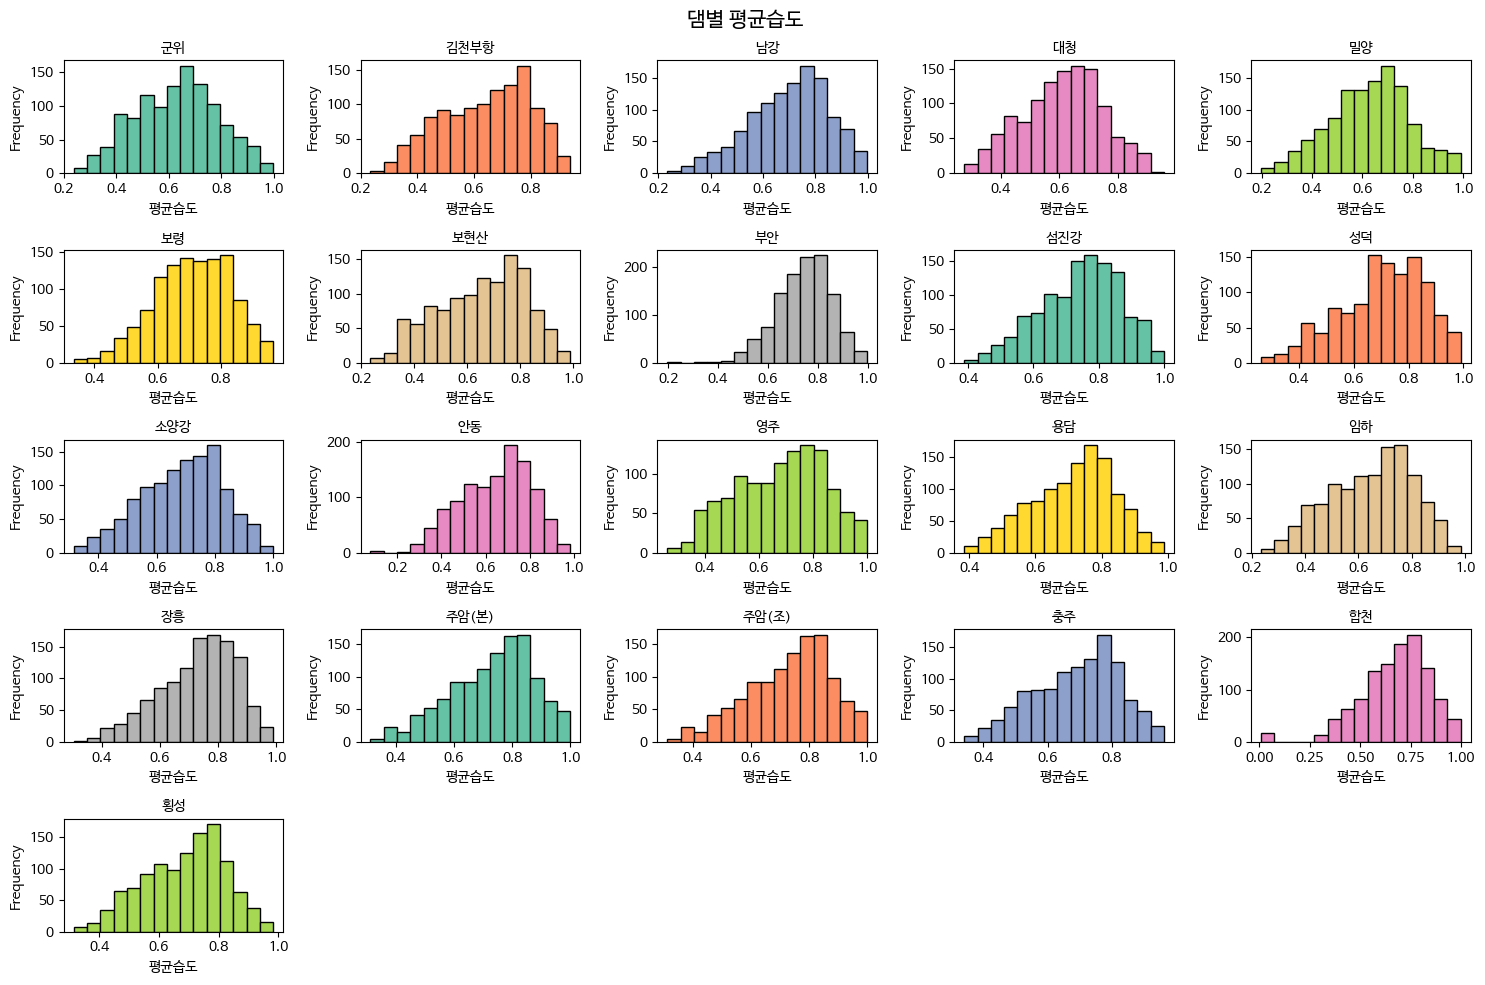

In [ ]:
### 댐별 평균습도 분포

# 서브플롯 배치 설정
nrows = 5
ncols = 5
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10))

# 컬러맵 설정
colors = sns.color_palette("Set2", len(group_dam))

# 각 댐별로 강우량의 히스토그램 시각화
for (name, data), ax, color in zip(group_dam, axes.flatten(), colors):
    data['avg_hmd'].plot.hist(ax=ax, bins=15, edgecolor='black', color=color)
    ax.set_title(name, fontsize=10)
    ax.set_xlabel('평균습도')
    ax.set_ylabel('Frequency')

# 남는 subplot 축 제거
for i in range(len(group_dam), nrows * ncols):
    axes.flatten()[i].remove()

# 전체 그래프 타이틀
plt.suptitle('댐별 평균습도', fontsize=15)

# 서브플롯 레이아웃 조정
plt.tight_layout()

plt.show()

In [ ]:
### 왜도

skew_hmd = group_dam['avg_hmd'].skew().reset_index()
skew_hmd.rename(columns = {'avg_hmd': 'skewness'}, inplace = True)

print(skew_hmd)

   dam_nm  skewness
0      군위 -0.062687
1    김천부항 -0.293273
2      남강 -0.460570
3      대청 -0.127813
4      밀양 -0.134610
5      보령 -0.287524
6     보현산 -0.302556
7      부안 -0.420156
8     섬진강 -0.349583
9      성덕 -0.443597
10    소양강 -0.279556
11     안동 -0.363727
12     영주 -0.210871
13     용담 -0.326481
14     임하 -0.288486
15     장흥 -0.524011
16  주암(본) -0.490192
17  주암(조) -0.490192
18     충주 -0.347284
19     합천 -0.893015
20     횡성 -0.316573


- 모든 댐에 대해 거의 정규분포에 가까운 분포를 보인다.
- 스케일 차이는 거의 없음을 확인할 수 있다.
- 일부 댐에 이상치가 존재함을 확인할 수 있다.
  - 이로 인해 왜도가 커지는 현상이 발생

In [ ]:
# 기술통계량 확인

group_dam['avg_hmd'].describe()

,count,mean,std,min,25%,50%,75%,max
dam_nm,,,,,,,,
군위,1168.0,0.630002,0.157539,0.237,0.51100,0.6410,0.74100,0.998
김천부항,1168.0,0.642170,0.154981,0.235,0.51800,0.6620,0.76650,0.939
남강,1168.0,0.699296,0.151657,0.234,0.60000,0.7180,0.81300,0.998
대청,1168.0,0.612246,0.136201,0.274,0.51500,0.6215,0.70800,0.959
밀양,1168.0,0.630054,0.158095,0.198,0.52400,0.6430,0.73800,0.990
보령,1168.0,0.710737,0.120860,0.334,0.62575,0.7160,0.80225,0.966
보현산,1168.0,0.654899,0.162524,0.235,0.53300,0.6700,0.78325,0.989
부안,1168.0,0.746045,0.108698,0.197,0.67400,0.7560,0.82300,0.998
섬진강,1168.0,0.743315,0.121027,0.388,0.66175,0.7565,0.83400,0.999


### **2-2-5. 평균기온(avg_tmr)**

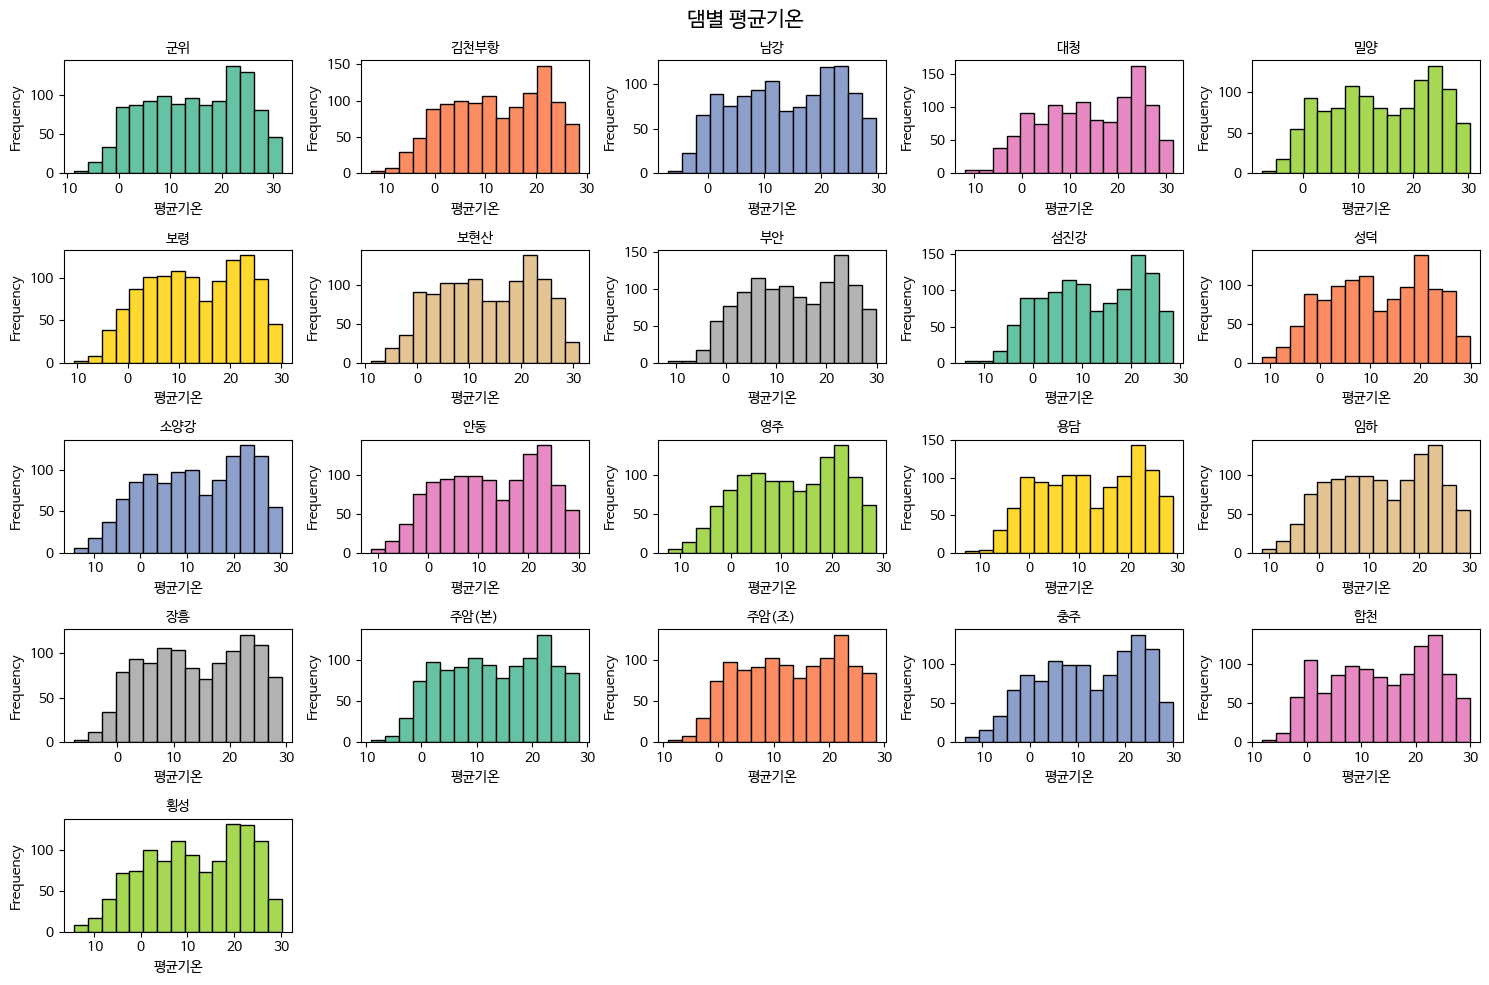

In [ ]:
### 댐별 평균기온 분포

# 서브플롯 배치 설정
nrows = 5
ncols = 5
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10))

# 컬러맵 설정
colors = sns.color_palette("Set2", len(group_dam))

# 각 댐별로 강우량의 히스토그램 시각화
for (name, data), ax, color in zip(group_dam, axes.flatten(), colors):
    data['avg_tmr'].plot.hist(ax=ax, bins=15, edgecolor='black', color=color)
    ax.set_title(name, fontsize=10)
    ax.set_xlabel('평균기온')
    ax.set_ylabel('Frequency')

# 남는 subplot 축 제거
for i in range(len(group_dam), nrows * ncols):
    axes.flatten()[i].remove()

# 전체 그래프 타이틀
plt.suptitle('댐별 평균기온', fontsize=15)

# 서브플롯 레이아웃 조정
plt.tight_layout()

plt.show()

In [ ]:
### 왜도

skew_tmr = group_dam['avg_tmr'].skew().reset_index()
skew_tmr.rename(columns = {'avg_tmr': 'skewness'}, inplace = True)

print(skew_tmr)

   dam_nm  skewness
0      군위 -0.157745
1    김천부항 -0.196804
2      남강 -0.122190
3      대청 -0.228962
4      밀양 -0.144771
5      보령 -0.144241
6     보현산 -0.123560
7      부안 -0.130663
8     섬진강 -0.163522
9      성덕 -0.119618
10    소양강 -0.229770
11     안동 -0.166813
12     영주 -0.202802
13     용담 -0.142492
14     임하 -0.166655
15     장흥 -0.094404
16  주암(본) -0.121585
17  주암(조) -0.121585
18     충주 -0.226548
19     합천 -0.152763
20     횡성 -0.227211


- 모든 댐에 대해 거의 정규분포에 가까운 분포를 보인다.
- 스케일 차이는 거의 없음을 확인할 수 있다.
- **성덕댐**의 경우 왜곡된 분포를 보이고 있다.
  - 일부 이상치가 존재함을 짐작할 수 있다.

In [ ]:
# 기술통계량 확인

group_dam.get_group('성덕')['avg_tmr'].describe()

count    1168.000000
mean       11.589298
std         9.828667
min       -11.500000
25%         3.575000
50%        11.500000
75%        20.400000
max        29.800000
Name: avg_tmr, dtype: float64

- 이상치가 존재함을 확인할 수 있다.
  - 이후 제거 예정

In [ ]:
# 기술통계량 확인

group_dam['avg_tmr'].describe()

,count,mean,std,min,25%,50%,75%,max
dam_nm,,,,,,,,
군위,1168.0,14.674229,9.369918,-8.7,6.900,14.95,22.9,31.6
김천부항,1168.0,12.150942,9.427661,-12.6,4.300,12.20,20.6,28.4
남강,1168.0,13.834418,9.101187,-7.0,6.275,13.70,22.0,29.6
대청,1168.0,14.111473,10.086627,-11.8,5.900,14.30,23.3,31.4
밀양,1168.0,14.364469,9.292835,-7.4,6.800,14.30,22.8,30.3
보령,1168.0,13.294178,9.295024,-10.5,5.600,13.20,21.5,30.1
보현산,1168.0,13.475297,9.203015,-8.9,5.775,13.70,21.6,31.0
부안,1168.0,13.704966,9.264257,-11.5,6.000,13.60,22.0,29.8
섬진강,1168.0,12.177997,9.527078,-13.8,4.200,12.05,20.9,28.4


### **2-2-6. 평균풍속(avg_wv)**

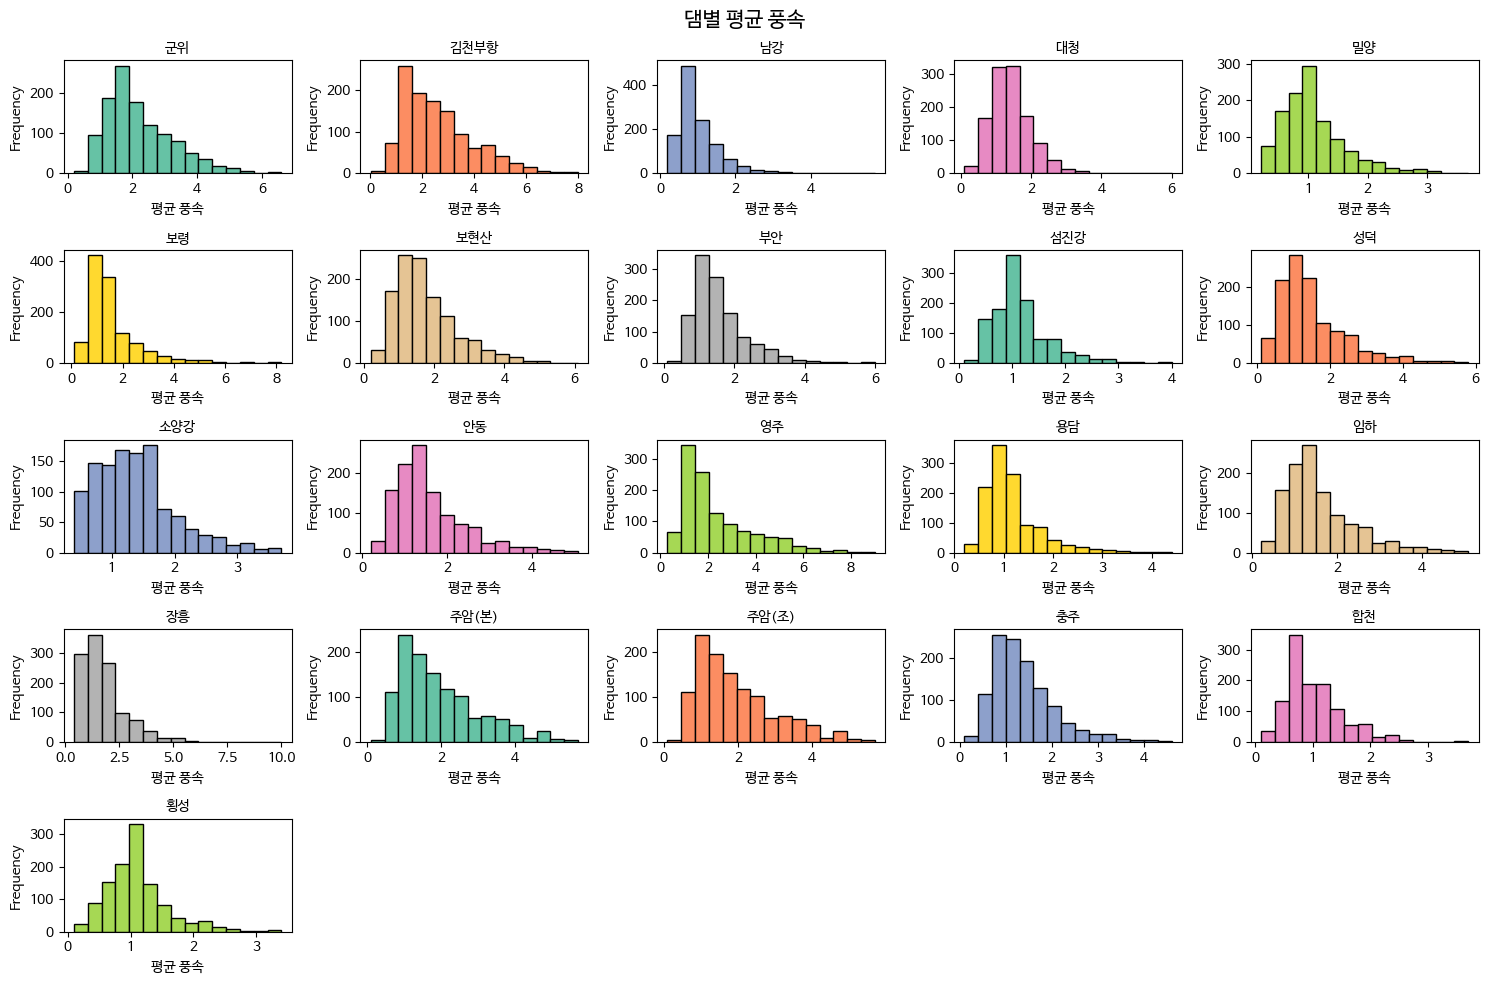

In [ ]:
### 댐별 평균 풍속 분포

# 서브플롯 배치 설정
nrows = 5
ncols = 5
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10))

# 컬러맵 설정
colors = sns.color_palette("Set2", len(group_dam))

# 각 댐별로 평균 풍속의 히스토그램 시각화
for (name, data), ax, color in zip(group_dam, axes.flatten(), colors):
    data['avg_wv'].plot.hist(ax=ax, bins=15, edgecolor='black', color=color)
    ax.set_title(name, fontsize=10)
    ax.set_xlabel('평균 풍속')
    ax.set_ylabel('Frequency')

# 남는 subplot 축 제거
for i in range(len(group_dam), nrows * ncols):
    axes.flatten()[i].remove()

# 전체 그래프 타이틀
plt.suptitle('댐별 평균 풍속', fontsize=15)

# 서브플롯 레이아웃 조정
plt.tight_layout()

plt.show()

In [ ]:
### 왜도

skew_wv = group_dam['avg_wv'].skew().reset_index()
skew_wv.rename(columns = {'avg_wv': 'skewness'}, inplace = True)

print(skew_wv)

   dam_nm  skewness
0      군위  0.960001
1    김천부항  0.955035
2      남강  2.481802
3      대청  1.400190
4      밀양  1.345532
5      보령  2.186206
6     보현산  1.194152
7      부안  1.659515
8     섬진강  1.351586
9      성덕  1.482980
10    소양강  1.011226
11     안동  1.298244
12     영주  1.283024
13     용담  1.670250
14     임하  1.298244
15     장흥  1.922682
16  주암(본)  0.977381
17  주암(조)  0.977381
18     충주  1.304519
19     합천  1.207498
20     횡성  1.152451


- 각 댐마다 스케일 차이가 어느 정도 존재함을 확인할 수 있다.
- 대부분의 댐에서 왜곡된 분포를 보이고 있다.

In [ ]:
# 기술통계량 확인

group_dam['avg_wv'].describe()

,count,mean,std,min,25%,50%,75%,max
dam_nm,,,,,,,,
군위,1168.0,2.213699,1.040558,0.20,1.4,2.0,2.8,6.6
김천부항,1168.0,2.605342,1.354886,0.02,1.6,2.3,3.4,8.0
남강,1168.0,1.031477,0.597680,0.20,0.7,0.9,1.2,5.7
대청,1168.0,1.409038,0.610090,0.10,1.0,1.3,1.7,6.0
밀양,1168.0,1.072606,0.542032,0.20,0.7,1.0,1.3,3.7
보령,1168.0,1.559589,1.021606,0.10,0.9,1.2,1.8,8.2
보현산,1168.0,1.742637,0.897591,0.20,1.1,1.5,2.2,6.1
부안,1168.0,1.541245,0.784371,0.10,1.0,1.3,1.9,6.0
섬진강,1168.0,1.159418,0.532569,0.10,0.8,1.0,1.4,4.0


### **2-2-7. 일사량(sun_sum)**

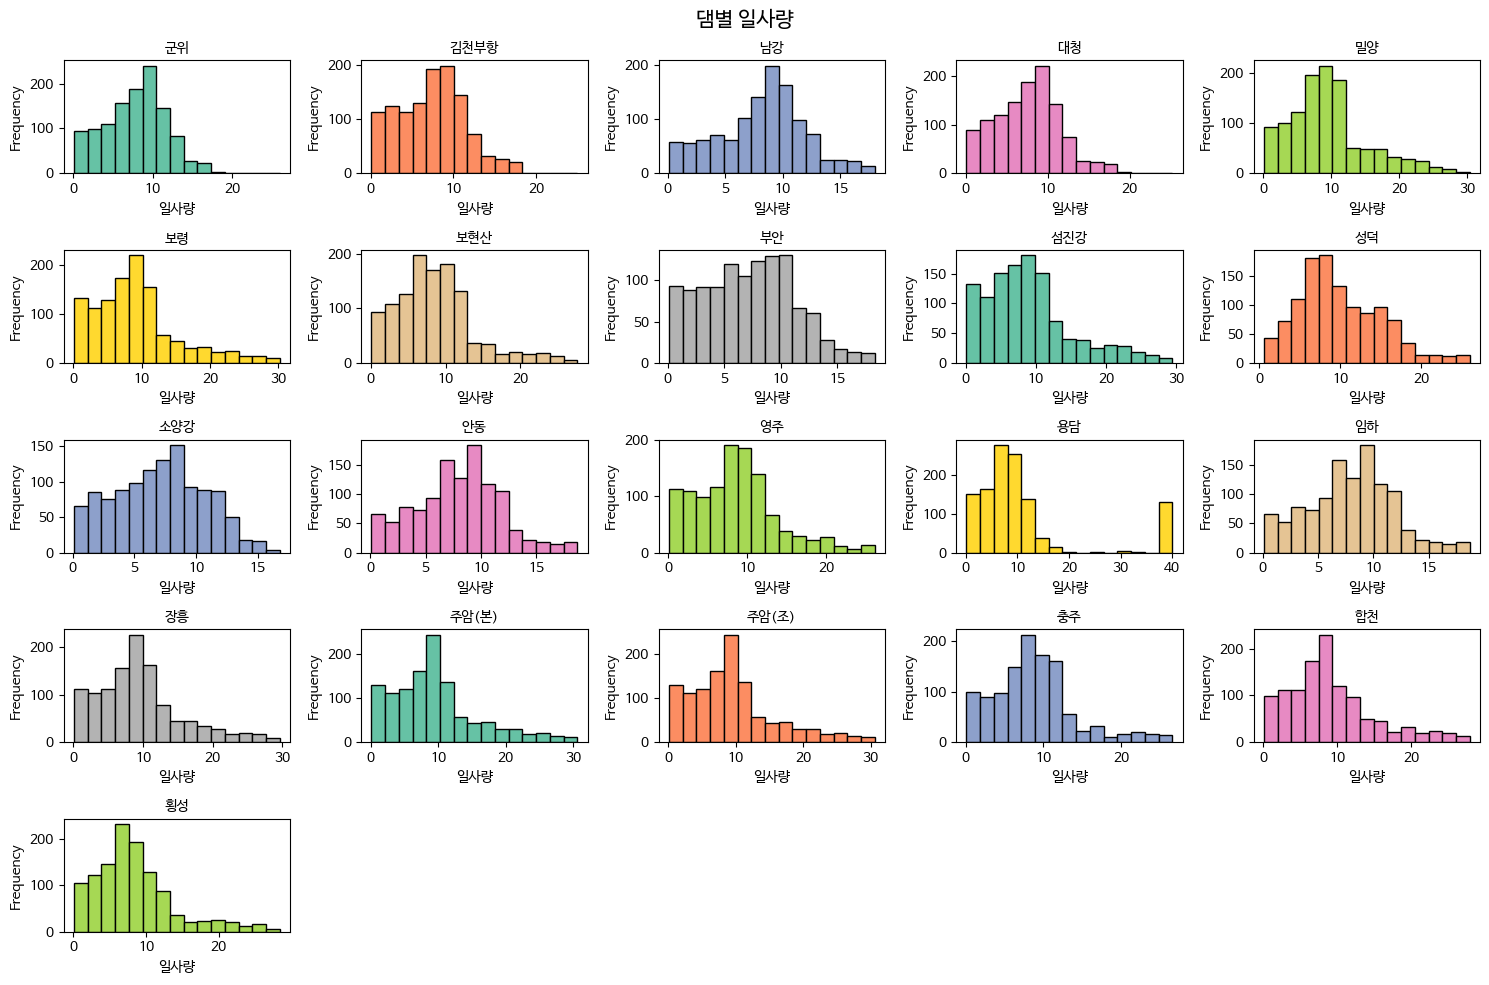

In [ ]:
### 댐별 일사량 분포

# 서브플롯 배치 설정
nrows = 5
ncols = 5
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10))

# 컬러맵 설정
colors = sns.color_palette("Set2", len(group_dam))

# 각 댐별로 일사량의 히스토그램 시각화
for (name, data), ax, color in zip(group_dam, axes.flatten(), colors):
    data['sun_sum'].plot.hist(ax=ax, bins=15, edgecolor='black', color=color)
    ax.set_title(name, fontsize=10)
    ax.set_xlabel('일사량')
    ax.set_ylabel('Frequency')

# 남는 subplot 축 제거
for i in range(len(group_dam), nrows * ncols):
    axes.flatten()[i].remove()

# 전체 그래프 타이틀
plt.suptitle('댐별 일사량', fontsize=15)

# 서브플롯 레이아웃 조정
plt.tight_layout()

plt.show()

In [ ]:
### 왜도

skew_sun = group_dam['sun_sum'].skew().reset_index()
skew_sun.rename(columns = {'sun_sum': 'skewness'}, inplace = True)

print(skew_sun)

   dam_nm  skewness
0      군위 -0.000147
1    김천부항  0.269328
2      남강 -0.116826
3      대청  0.240996
4      밀양  0.863101
5      보령  1.024880
6     보현산  0.950626
7      부안  0.185903
8     섬진강  0.985446
9      성덕  0.654389
10    소양강  0.034522
11     안동  0.093594
12     영주  0.736197
13     용담  1.933627
14     임하  0.093594
15     장흥  0.904837
16  주암(본)  0.980065
17  주암(조)  0.980065
18     충주  0.931074
19     합천  0.967128
20     횡성  1.168397


- 댐마다(지역마다) 일사량 차이가 꽤 큰 것을 확인할 수 있다.
- 몇몇 댐에서 왜곡된 분포를 보이고 있다.

In [ ]:
# 기술통계량 확인

group_dam['sun_sum'].describe()

,count,mean,std,min,25%,50%,75%,max
dam_nm,,,,,,,,
군위,1168.0,7.852175,3.818152,0.1,5.1000,8.30,10.3250,26.00
김천부항,1168.0,7.476704,4.099476,0.1,4.2750,7.70,10.2000,25.00
남강,1168.0,8.179110,3.813449,0.1,5.7000,8.60,10.6000,18.00
대청,1168.0,7.688091,3.957382,0.1,4.8000,7.95,10.1000,25.20
밀양,1168.0,9.576301,5.746660,0.1,5.7000,8.90,11.8000,30.42
보령,1168.0,9.210574,6.193980,0.1,4.9000,8.55,11.3000,30.20
보현산,1168.0,8.640642,5.217382,0.1,5.1000,8.00,11.0850,27.60
부안,1168.0,7.218236,4.036887,0.1,4.0000,7.30,10.2000,18.30
섬진강,1168.0,9.054752,6.207414,0.1,4.6375,8.10,11.6075,29.46


- 몇몇 댐에서 이상치가 존재함을 짐작할 수 있다.

# **3. 군집화**

## **3-1. 이상치 처리**
- KMeans 군집화와 같이 거리 기반 군집화는 이상치에 많은 영향을 받음
  - 이상치 제거 후 군집화 수행
- 대부분의 변수들은 변수 특성상 이상치를 가지는 것이 당연하다고 생각됨
- 또한, 지역별(댐별), 연도별로, 월별로 차이가 있을 것이라고 생각함
  - 해당 부분들을 고려하여 ```avg_hmd```, ```avg_tmr``` 변수에 대해서만 이상치 처리 진행
  - 이상치 처리는 train 데이터에 대해서만 처리


In [ ]:
### 이상치 탐지 함수

def get_outlier_indices(df_col, weight=1.5):
  q1, q3 = np.percentile(df_col, [25, 75])
  iqr = q3 - q1
  iqr_weight = iqr * weight
  lowest_val, highest_val = q1 - iqr_weight, q3 + iqr_weight
  outlier_indices = df_col[(df_col < lowest_val) | (df_col > highest_val)].index
  return outlier_indices

In [ ]:
cols = ['avg_hmd', 'avg_tmr']
rows_to_drop = []

for col in cols:
  grouped = df_train.groupby(['dam_nm', df_train['obsr_de'].dt.year, df_train['obsr_de'].dt.month])
  for (_, _, _), group_data in grouped:
    outlier_indices = get_outlier_indices(group_data[col])
    rows_to_drop.extend(outlier_indices)

In [ ]:
# 이상치가 포함된 행 삭제

df_train.drop(rows_to_drop, inplace=True)

In [ ]:
print(len(df_train))

23553


- 원래 24528개의 데이터에서 23553개로 데이터가 감소함

## **3-2. 군집화 수행**

In [ ]:
## 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화하는 함수
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 개수들을 리스트로 받아서, 각 개수별로 클러스터링을 적용하고
    # 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize = (4 * n_cols, 4),
                            nrows = 1, ncols = n_cols)

    # 리스트에 기재된 클러스터링 개수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        # KMeans 클러스터링을 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산
        clusterer = KMeans(n_clusters = n_cluster,
                           max_iter = 500, random_state = 0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
df_train.head()

,dam_nm,obsr_de,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,tot_qy,valid_qy,unused_qy,maximum_use_qy,avg_hmd,avg_tmr,avg_wv,sun_sum,year,season
1066,군위,2019-06-03,0.0000,0.000,1.080,19.5330,0.4010,48.7,40.1,5.5,40.1,0.441,25.4,1.3,16.5,2019,summer
638,군위,2020-11-30,0.0000,0.099,1.525,29.5280,0.6060,48.7,40.1,5.5,40.1,0.479,3.8,3.1,9.2,2020,autumn
799,군위,2021-05-10,16.2365,0.356,0.768,22.2280,0.4560,48.7,40.1,5.5,40.1,0.665,13.8,1.3,0.5,2021,spring
380,군위,2022-08-17,21.9402,3.469,0.436,11.0724,0.2274,48.7,40.1,5.5,40.1,0.894,25.7,2.2,4.6,2022,summer
303,군위,2022-09-29,0.0000,0.022,0.352,15.5466,0.3192,48.7,40.1,5.5,40.1,0.740,20.6,0.9,12.2,2022,autumn


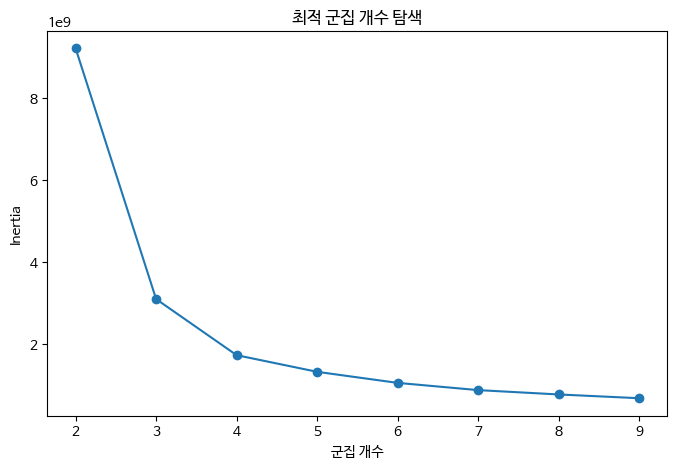

In [ ]:
from sklearn.cluster import KMeans

## 필요한 특성 선택
data = df_train.drop(['dam_nm', 'obsr_de', 'unused_qy', 'year', 'season'], axis = 1)

## 군집화 개수 선택
# 2부터 5까지 군집 개수를 시도해보고, Elbow Method를 통해 가장 적절한 군집 개수를 선택
cluster_range = range(2, 10)
inertia = []
for n_cluster in cluster_range:
  kmeans = KMeans(n_clusters = n_cluster, init = "k-means++", random_state = 42)
  kmeans.fit(data)
  inertia.append(kmeans.inertia_)

plt.figure(figsize = (8, 5))
plt.plot(cluster_range, inertia, marker = "o")
plt.xticks(cluster_range)
plt.xlabel("군집 개수")
plt.ylabel("Inertia")
plt.title("최적 군집 개수 탐색")
plt.show()

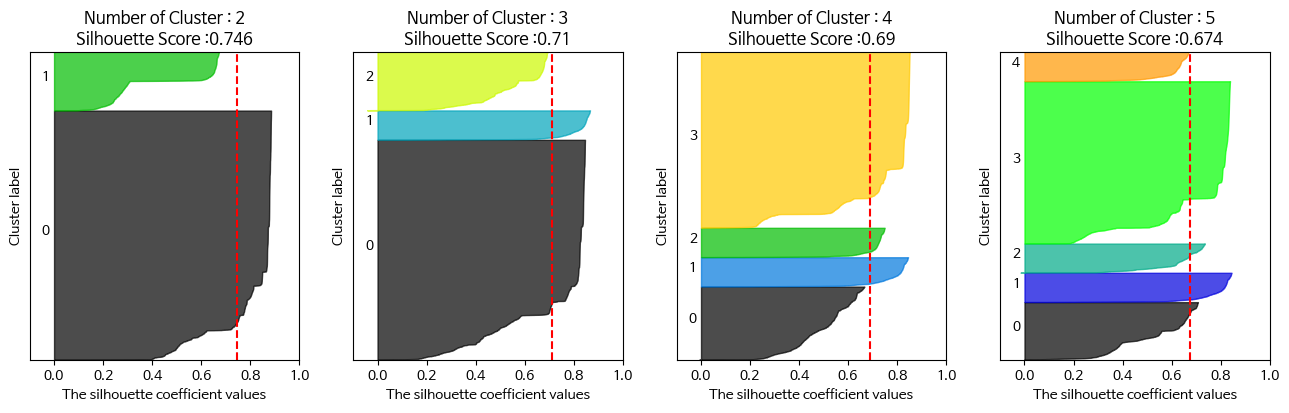

In [ ]:
# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화
visualize_silhouette([2, 3, 4, 5], data)

- **4개**의 군집이 가장 적절해 보인다.

In [ ]:
## 선택된 군집 개수로 K-Means 군집화 수행
optimal = 4  # 선택된 최적 군집 개수
kmeans = KMeans(n_clusters = optimal, init = "k-means++", random_state = 42)
kmeans.fit(data)

df_train['cluster'] = kmeans.labels_
data['cluster'] = kmeans.labels_

## 군집화 결과와 실제 군집 비교
cluster_result = df_train.groupby(['cluster', 'dam_nm'])['reserve_qy'].count()
print(cluster_result)

cluster  dam_nm
0        군위        1123
         김천부항      1135
         남강        1113
         밀양        1127
         보령        1123
         보현산       1126
         부안        1122
         성덕        1119
         영주        1112
         장흥        1123
         주암(조)     1124
         횡성        1126
1        소양강       1117
         충주        1124
2        남강           4
         섬진강       1130
         용담        1128
         임하        1116
         주암(본)     1124
         합천        1091
3        대청        1132
         안동        1114
Name: reserve_qy, dtype: int64


In [ ]:
### 군집 재배치

df_train.loc[df_train['dam_nm'] == '남강', 'cluster'] = 0
data.loc[df_train['dam_nm'] == '남강','cluster'] = 0

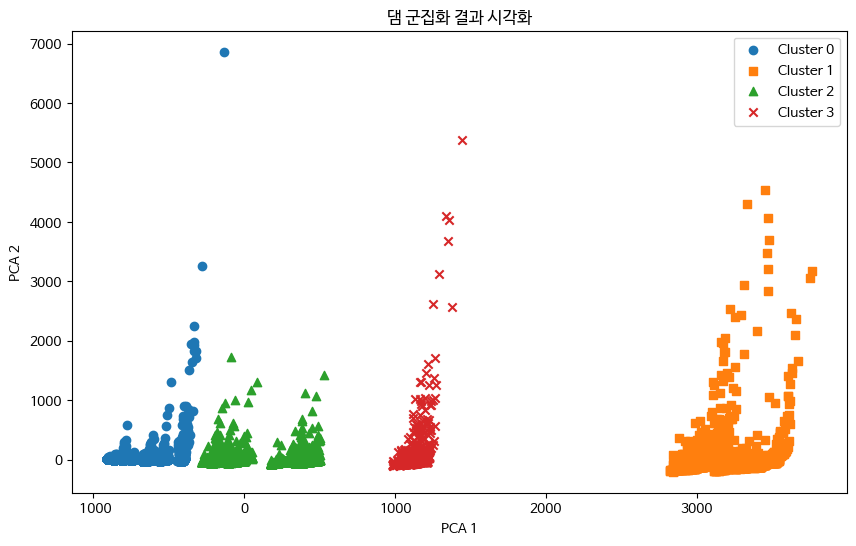

In [ ]:
## 군집화 결과 시각화
# PCA를 통해 데이터를 2차원으로 차원 축소한 뒤 시각화

from sklearn.decomposition import PCA

# PCA를 통해 데이터를 2차원으로 차원 축소
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data)

# 시각화
plt.figure(figsize=(10, 6))
for cluster_num in range(optimal):
    plt.scatter(pca_transformed[data['cluster'] == cluster_num, 0],
                pca_transformed[data['cluster'] == cluster_num, 1],
                label=f'Cluster {cluster_num}', marker=['o', 's', '^', 'x'][cluster_num])

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('댐 군집화 결과 시각화')
plt.legend()
plt.show()

- 대부분 잘 군집화 된 것을 확인할 수 있다.

## **3-3. 결과 해석**

- 대부분 잘 군집화 된 것을 확인할 수 있다.
- 다음과 같이 **4개**의 그룹으로 최종적으로 댐을 나눌 수 있음
  - group 1(Cluster 0): 군위, 김천부항, 남강, 밀양, 보령, 보현산, 부안, 성덕, 영주, 장흥, 주암(조). 횡성
  - group 2(Cluster 1): 소양강, 충주
  - group 3(Cluster 2): 섬진강, 용담, 임하, 주암(본), 합천
  - group 4(Cluster 3): 대청, 안동

### **✅ Group 1(Cluster 0)**
- 군위, 김천부항, 남강, 밀양, 보령, 보현산, 부안, 성덕, 영주, 장흥, 주암(조). 횡성
> 대부분의 댐들이 그룹 1에 속한다.

In [ ]:
group1_tr = df_train.loc[df_train['cluster'] == 0, :]
group1_tr.head()

,dam_nm,obsr_de,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,tot_qy,valid_qy,unused_qy,maximum_use_qy,avg_hmd,avg_tmr,avg_wv,sun_sum,year,season,cluster
1066,군위,2019-06-03,0.0000,0.000,1.080,19.5330,0.4010,48.7,40.1,5.5,40.1,0.441,25.4,1.3,16.5,2019,summer,0
638,군위,2020-11-30,0.0000,0.099,1.525,29.5280,0.6060,48.7,40.1,5.5,40.1,0.479,3.8,3.1,9.2,2020,autumn,0
799,군위,2021-05-10,16.2365,0.356,0.768,22.2280,0.4560,48.7,40.1,5.5,40.1,0.665,13.8,1.3,0.5,2021,spring,0
380,군위,2022-08-17,21.9402,3.469,0.436,11.0724,0.2274,48.7,40.1,5.5,40.1,0.894,25.7,2.2,4.6,2022,summer,0
303,군위,2022-09-29,0.0000,0.022,0.352,15.5466,0.3192,48.7,40.1,5.5,40.1,0.740,20.6,0.9,12.2,2022,autumn,0


In [ ]:
group1_tr.describe().iloc[:,:-2]

,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,tot_qy,valid_qy,unused_qy,maximum_use_qy,avg_hmd,avg_tmr,avg_wv,sun_sum
count,13477.000000,13477.000000,13477.000000,13477.000000,13477.000000,13477.000000,13477.000000,13477.000000,13477.000000,13477.00000,13477.000000,13477.000000,13477.000000
mean,3.074352,8.014794,8.431023,63.332477,0.559749,117.474294,104.310780,7.821006,102.281490,0.68562,13.118954,1.699413,8.754158
std,11.710621,68.844467,64.799098,51.712779,0.181338,89.819547,84.343982,5.208418,83.224086,0.14882,9.446959,1.095118,5.222538
min,0.000000,0.000000,0.000000,0.003000,0.000000,22.110000,17.880000,0.800000,17.820000,0.19800,-14.200000,0.020000,0.100000
25%,0.000000,0.164000,0.770000,24.981000,0.436000,50.300000,40.100000,3.700000,35.600000,0.58500,5.300000,1.000000,5.270000
50%,0.000000,0.757000,1.731000,44.957200,0.563000,73.600000,69.800000,5.900000,69.800000,0.70400,13.200000,1.400000,8.400000
75%,0.149500,3.573000,3.972000,87.748800,0.706000,181.100000,160.400000,12.000000,160.400000,0.79700,21.500000,2.100000,11.110000
max,238.431000,4947.819000,5027.616000,248.885000,0.984000,309.200000,299.700000,20.000000,299.700000,1.00000,31.600000,10.000000,30.600000


### **✅ Group 2(Cluster 1)**
- 소양강, 충주

In [ ]:
group2_tr = df_train.loc[df_train['cluster'] == 1, :]
group2_tr.head()

,dam_nm,obsr_de,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,tot_qy,valid_qy,unused_qy,maximum_use_qy,avg_hmd,avg_tmr,avg_wv,sun_sum,year,season,cluster
15676,소양강,2019-06-03,0.0000,0.690,79.700,1606.3260,0.5540,2900.0,1900.0,650.0,1900.0,0.583,22.3,1.4,14.3,2019,summer,1
15248,소양강,2020-11-30,0.0000,13.311,48.294,1785.5940,0.6160,2900.0,1900.0,650.0,1900.0,0.651,-2.1,0.8,8.1,2020,autumn,1
15409,소양강,2021-05-10,0.0000,34.054,75.483,1514.6530,0.5223,2900.0,1900.0,650.0,1900.0,0.705,12.3,1.0,9.0,2021,spring,1
14990,소양강,2022-08-17,4.6857,194.054,473.338,2093.5270,0.7219,2900.0,1900.0,650.0,1900.0,0.881,24.6,1.5,7.5,2022,summer,1
14913,소양강,2022-09-29,0.0000,16.403,97.317,2087.2694,0.7197,2900.0,1900.0,650.0,1900.0,0.885,18.4,1.0,7.9,2022,autumn,1


In [ ]:
group2_tr.describe().iloc[:,:-2]

,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,tot_qy,valid_qy,unused_qy,maximum_use_qy,avg_hmd,avg_tmr,avg_wv,sun_sum
count,2241.000000,2241.000000,2241.000000,2241.000000,2241.000000,2241.000000,2241.000000,2241.000000,2241.000000,2241.000000,2241.000000,2241.000000,2241.000000
mean,3.194509,104.361119,107.696841,1616.782075,0.571687,2824.765730,1844.326640,622.915663,1830.548416,0.688340,12.168016,1.348310,8.029621
std,10.843289,297.083494,235.807301,278.913606,0.095313,75.016373,55.512116,27.005894,78.812223,0.133449,10.546021,0.653767,4.593506
min,0.000000,0.000000,11.160000,848.952100,0.308700,2750.000000,1789.000000,596.000000,1538.000000,0.316000,-14.200000,0.100000,0.100000
25%,0.000000,15.791000,45.333000,1460.897600,0.516000,2750.000000,1789.000000,596.000000,1789.000000,0.589000,3.400000,0.900000,5.000000
50%,0.000000,34.217000,70.008000,1639.560000,0.575000,2750.000000,1789.000000,596.000000,1789.000000,0.703000,12.300000,1.200000,7.900000
75%,0.702300,78.096000,85.238000,1811.398400,0.638000,2900.000000,1900.000000,650.000000,1900.000000,0.788000,21.700000,1.700000,10.600000
max,136.167000,4359.742000,3960.253000,2416.721000,0.833000,2900.000000,1900.000000,650.000000,1900.000000,1.000000,30.300000,4.600000,26.600000


### **✅ Group 3(Cluster 2)**
- 섬진강, 용담, 임하, 주암(본), 합천

In [ ]:
group3_tr = df_train.loc[df_train['cluster'] == 2, :]
group3_tr.head(3)

,dam_nm,obsr_de,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,tot_qy,valid_qy,unused_qy,maximum_use_qy,avg_hmd,avg_tmr,avg_wv,sun_sum,year,season,cluster
12754,섬진강,2019-06-03,0.0000,1.364,36.785,243.3730,0.5220,466.0,429.0,6.7,429.0,0.597,20.7,0.9,27.90,2019,summer,2
12326,섬진강,2020-11-30,0.0000,0.866,5.278,292.2481,0.6271,466.0,429.0,6.7,429.0,0.650,2.3,1.3,7.60,2020,autumn,2
12487,섬진강,2021-05-10,1.0802,1.441,34.310,259.8907,0.5577,466.0,429.0,6.7,429.0,0.743,12.8,0.9,7.51,2021,spring,2


In [ ]:
group3_tr.describe().iloc[:,:-2]

,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,tot_qy,valid_qy,unused_qy,maximum_use_qy,avg_hmd,avg_tmr,avg_wv,sun_sum
count,5589.000000,5589.000000,5589.000000,5589.000000,5589.000000,5589.000000,5589.000000,5589.00000,5589.000000,5589.000000,5589.000000,5589.000000,5589.000000
mean,2.826314,17.072462,21.239023,367.839132,0.577281,623.631777,487.131508,78.57309,485.789229,0.700318,12.809770,1.372231,9.386069
std,9.521917,61.868559,57.841908,161.430589,0.165830,153.524868,114.402424,51.90736,113.533464,0.145172,9.496335,0.804202,6.995481
min,0.000000,0.000000,0.000000,81.409000,0.174700,457.000000,352.000000,6.70000,352.000000,0.008000,-13.800000,0.100000,0.100000
25%,0.000000,2.297000,8.782000,257.770000,0.456300,466.000000,424.000000,45.00000,424.000000,0.604000,4.800000,0.800000,5.200000
50%,0.000000,4.869000,13.779000,319.128000,0.587100,595.000000,429.000000,70.00000,429.000000,0.723000,12.800000,1.200000,8.400000
75%,0.387000,10.876000,16.679000,463.034000,0.685000,790.000000,560.000000,124.00000,560.000000,0.804000,21.300000,1.700000,11.400000
max,133.392300,1716.221000,1833.162000,753.723000,0.979000,815.000000,672.000000,150.00000,672.000000,0.999000,30.000000,5.700000,40.000000


### **✅ Group 4(Cluster 3)**
- 대청, 안동

In [ ]:
group4_tr = df_train.loc[df_train['cluster'] == 3, :]
group4_tr.head()

,dam_nm,obsr_de,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,tot_qy,valid_qy,unused_qy,maximum_use_qy,avg_hmd,avg_tmr,avg_wv,sun_sum,year,season,cluster
5449,대청,2019-06-03,0.0000,11.544,57.174,934.3070,0.6270,1490.0,790.0,450.0,790.0,0.419,24.0,1.2,17.8,2019,summer,3
5021,대청,2020-11-30,0.0000,17.390,30.792,968.0540,0.6500,1490.0,790.0,450.0,790.0,0.610,1.3,1.1,8.6,2020,autumn,3
5182,대청,2021-05-10,12.0061,27.910,46.224,829.2630,0.5570,1490.0,790.0,450.0,790.0,0.771,12.2,1.3,3.0,2021,spring,3
4763,대청,2022-08-17,7.8057,565.555,32.950,966.2260,0.6485,1490.0,790.0,450.0,790.0,0.799,25.7,1.2,3.3,2022,summer,3
4686,대청,2022-09-29,0.0000,16.723,40.726,996.6585,0.6689,1490.0,790.0,450.0,790.0,0.761,20.0,0.8,9.6,2022,autumn,3


In [ ]:
group4_tr.describe().iloc[:,:-2]

,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,tot_qy,valid_qy,unused_qy,maximum_use_qy,avg_hmd,avg_tmr,avg_wv,sun_sum
count,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000
mean,2.829409,51.225675,54.998650,901.754293,0.658952,1369.969724,894.158504,349.809439,890.338379,0.627909,13.322974,1.497621,7.856006
std,9.239427,197.547453,172.468066,134.619268,0.087435,121.023059,105.020010,101.019248,103.082433,0.143012,9.975660,0.732105,3.832249
min,0.000000,0.000000,0.000000,519.211700,0.416000,1248.000000,790.000000,248.000000,790.000000,0.235000,-11.800000,0.100000,0.100000
25%,0.000000,8.267500,22.742500,821.478000,0.605000,1248.000000,790.000000,248.000000,790.000000,0.525000,5.000000,1.000000,5.300000
50%,0.000000,17.008000,31.124500,912.323150,0.661000,1490.000000,790.000000,450.000000,790.000000,0.638500,13.400000,1.300000,8.100000
75%,0.351750,31.307500,41.511000,997.394000,0.719000,1490.000000,1000.000000,450.000000,1000.000000,0.733750,22.300000,1.800000,10.300000
max,83.214900,4590.323000,3274.129000,1304.602000,0.876000,1490.000000,1000.000000,450.000000,1000.000000,0.965000,31.400000,6.000000,20.000000


In [ ]:
### 각 그룹의 데이터 개수 확인
print(len(group1_tr), len(group2_tr), len(group3_tr), len(group4_tr))

13477 2241 5589 2246


In [ ]:
### 테스트 데이터도 group으로 묶기

grouping = df_train[['dam_nm', 'cluster']].drop_duplicates().reset_index(drop = True)
df_test = pd.merge(df_test, grouping, on = 'dam_nm', how = 'inner')

group1_te = df_test.loc[df_test['cluster'] == 0, :]
group2_te = df_test.loc[df_test['cluster'] == 1, :]
group3_te = df_test.loc[df_test['cluster'] == 2, :]
group4_te = df_test.loc[df_test['cluster'] == 3, :]

# **4. 추가적인 전처리 수행**

## **4-1. 변수 왜곡 확인**

In [ ]:
groups = {
    'group1': group1_tr,
    'group2': group2_tr,
    'group3': group3_tr,
    'group4': group4_tr
}

cols = ['rain_qy', 'inflow_qy', 'outflow_qy', 'avg_hmd', 'avg_tmr', 'avg_wv', 'sun_sum', 'reserve_qy']

for group, data in groups.items():
  group_dam = data.groupby('dam_nm')
  print(f"===== {group} 데이터 =====")
  for col in cols:
      skew_val = group_dam[col].skew()
      print(f"*{col}*의 skewness: {skew_val}")
      print()
  print()

===== group1 데이터 =====
*rain_qy*의 skewness: dam_nm
군위       7.511002
김천부항     6.201743
남강       8.232965
밀양       9.161914
보령       5.538991
보현산      7.283479
부안       6.334857
성덕       7.208545
영주       5.420548
장흥       8.871873
주암(조)    5.185948
횡성       7.529960
Name: rain_qy, dtype: float64

*inflow_qy*의 skewness: dam_nm
군위       12.015566
김천부항      8.410357
남강       12.512964
밀양       13.279554
보령        7.384127
보현산      13.326210
부안       10.232058
성덕       11.296800
영주        8.962846
장흥       15.930166
주암(조)     7.483292
횡성       13.263947
Name: inflow_qy, dtype: float64

*outflow_qy*의 skewness: dam_nm
군위       13.150816
김천부항     13.051804
남강       14.104785
밀양       11.170478
보령        9.698976
보현산      10.959266
부안       11.956472
성덕       10.645006
영주        7.924235
장흥        6.675740
주암(조)     4.506698
횡성       15.919610
Name: outflow_qy, dtype: float64

*avg_hmd*의 skewness: dam_nm
군위      -0.082368
김천부항    -0.298873
남강      -0.466303
밀양      -0.174245
보령      -0.282994


- 왜도의 절댓값이 1 이상인 경우 분포가 심하게 왜곡되어 데이터 변환이 필요하다고 판단
- **group 1**
  - feature: rain_qy, inflow_qy, outflow_qy, avg_wv, sun_sum
  - target: o
- **group 2**
  - feature: rain_qy, inflow_qy, outflow_qy, avg_wv, sun_sum
  - target: x
- **group 3**
  - feature: rain_qy, inflow_qy, outflow_qy, avg_wv, sun_sum
  - target: x
- **group 4**
  - feature: rain_qy, inflow_qy, outflow_qy, avg_wv
  - target: x

## **4-2. 데이터 변환(로그 변환)**

- ```rain_qy```, ```inflow_qy```, ```outflow_qy```, ```avg_wv```의 경우 대부분의 댐에서 왜곡된 분포를 보인다.
- ```sun_sum```의 경우 일부 댐에서만 왜곡된 분포를 보인다.
- 왜도의 절댓값이 1 이상인 경우 주로 분포가 왜곡되었다고 판단함
  - 변수별로, 댐별로 **로그 변환** 수행
  - 로그 변환의 경우 train, test 데이터셋에 모두 적용

In [ ]:
# 로그 변환을 수행하는 함수

def log_transform(data):
    return np.log1p(data)

def apply_log_transform(train_data, test_data, cols):
  for col in cols:
    train_data[col] = log_transform(train_data[col])
    test_data[col] = log_transform(test_data[col])

In [ ]:
apply_log_transform(group1_tr, group1_te, ['rain_qy', 'inflow_qy', 'outflow_qy', 'avg_wv', 'sun_sum'])
apply_log_transform(group2_tr, group2_te, ['rain_qy', 'inflow_qy', 'outflow_qy', 'avg_wv', 'sun_sum'])
apply_log_transform(group3_tr, group3_te, ['rain_qy', 'inflow_qy', 'outflow_qy', 'avg_wv', 'sun_sum'])
apply_log_transform(group4_tr, group4_te, ['rain_qy', 'inflow_qy', 'outflow_qy', 'avg_wv'])

# group 1의 경우 target 로그 변환도 수행
group1_tr['reserve_qy'] = log_transform(group1_tr['reserve_qy'])

In [ ]:
### 왜곡 정도 재확인

groups = {
    'group1': group1_tr,
    'group2': group2_tr,
    'group3': group3_tr,
    'group4': group4_tr

}

cols = ['rain_qy', 'inflow_qy', 'outflow_qy', 'avg_hmd', 'avg_tmr', 'avg_wv', 'sun_sum', 'reserve_qy']

for group, data in groups.items():
  group_dam = data.groupby('dam_nm')
  print(f"===== {group} 데이터 =====")
  for col in cols:
      skew_val = group_dam[col].skew()
      print(f"*{col}*의 skewness: {skew_val}")
      print()
  print()

===== group1 데이터 =====
*rain_qy*의 skewness: dam_nm
군위       2.601569
김천부항     2.273491
남강       2.265841
밀양       2.541210
보령       2.150213
보현산      2.605692
부안       2.049535
성덕       2.303976
영주       2.407838
장흥       2.150362
주암(조)    2.295689
횡성       2.271156
Name: rain_qy, dtype: float64

*inflow_qy*의 skewness: dam_nm
군위       3.739802
김천부항     2.657267
남강       1.449849
밀양       2.496635
보령       1.682294
보현산      4.751380
부안       2.705453
성덕       3.915043
영주       1.578117
장흥       1.597239
주암(조)    0.298422
횡성       1.900862
Name: inflow_qy, dtype: float64

*outflow_qy*의 skewness: dam_nm
군위       4.742060
김천부항     5.044506
남강       1.463638
밀양       4.602305
보령       6.244063
보현산      8.580853
부안       4.592339
성덕       5.772640
영주       1.484671
장흥       3.093875
주암(조)    3.466666
횡성       3.679257
Name: outflow_qy, dtype: float64

*avg_hmd*의 skewness: dam_nm
군위      -0.082368
김천부항    -0.298873
남강      -0.466303
밀양      -0.174245
보령      -0.282994
보현산     -0.317574
부안    

- 데이터 왜곡 정도가 많이 완화되었음을 확인할 수 있다.

## **4-3. 데이터 스케일링**
- 데이터 스케일링은 **수치형** 변수에 대해서만 수행  
- 이상치 영향을 덜 받는 표준정규화 수행
  - RobustScaler
- **그룹별**로 스케일링 진행

In [ ]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

def preprocess_and_scale_group_data(train_groups, test_groups):
    train_scaled_groups = []
    test_scaled_groups = []

    scaler = RobustScaler()  # 그룹별 스케일러 객체 생성

    # 사용할 수치형 feature 변수 리스트
    cols = ['rain_qy', 'inflow_qy', 'outflow_qy', 'avg_hmd', 'avg_tmr', 'avg_wv', 'sun_sum', 'reserve_qy']

    for train_group, test_group in zip(train_groups, test_groups):
        # 그룹별로 수치형 변수 스케일링 진행
        train_num = train_group[cols]
        test_num = test_group[cols]
        train_num_scaled = pd.DataFrame(scaler.fit_transform(train_num), columns=train_num.columns)
        test_num_scaled = pd.DataFrame(scaler.transform(test_num), columns=test_num.columns)

        # 인덱스 초기화
        train_final = pd.concat([train_group.drop(cols, axis=1).reset_index(drop=True), train_num_scaled], axis=1)
        test_final = pd.concat([test_group.drop(cols, axis=1).reset_index(drop=True), test_num_scaled], axis=1)

        train_scaled_groups.append(train_final)
        test_scaled_groups.append(test_final)

    return train_scaled_groups, test_scaled_groups

In [ ]:
# 그룹별 데이터 리스트 생성
train_groups = [group1_tr, group2_tr, group3_tr, group4_tr]  # 데이터프레임을 리스트로 저장
test_groups = [group1_te, group2_te, group3_te, group4_te]

# 데이터 스케일링 및 저장
scaled_train_groups, scaled_test_groups = preprocess_and_scale_group_data(train_groups, test_groups)

In [ ]:
train_groups[0].head(3)

,dam_nm,obsr_de,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,tot_qy,valid_qy,unused_qy,maximum_use_qy,avg_hmd,avg_tmr,avg_wv,sun_sum,year,season,cluster
1066,군위,2019-06-03,0.000000,0.000000,0.732368,3.022033,0.401,48.7,40.1,5.5,40.1,0.441,25.4,0.832909,2.862201,2019,summer,0
638,군위,2020-11-30,0.000000,0.094401,0.926241,3.418644,0.606,48.7,40.1,5.5,40.1,0.479,3.8,1.410987,2.322388,2020,autumn,0
799,군위,2021-05-10,2.847029,0.304539,0.569849,3.145358,0.456,48.7,40.1,5.5,40.1,0.665,13.8,0.832909,0.405465,2021,spring,0


In [ ]:
test_groups[0].head(3)

,dam_nm,obsr_de,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,tot_qy,valid_qy,unused_qy,maximum_use_qy,avg_hmd,avg_tmr,avg_wv,sun_sum,year,season,cluster
0,군위,2021-08-11,0.996838,0.189794,0.863312,27.9460,0.574,48.7,40.1,5.5,40.1,0.761,25.6,0.875469,1.945910,2021,summer,0
1,군위,2019-07-12,0.000000,0.169743,0.832039,17.7640,0.365,48.7,40.1,5.5,40.1,0.650,25.3,1.131402,2.617396,2019,summer,0
2,군위,2022-11-19,0.000000,0.000000,0.214305,14.6331,0.301,48.7,40.1,5.5,40.1,0.744,11.2,0.955511,2.230014,2022,autumn,0


- 데이터가 제대로 스케일링 되었음을 확인할 수 있다.

In [ ]:
### 왜곡 정도 재확인

groups = {
    'group1': group1_tr,
    'group2': group2_tr,
    'group3': group3_tr,
    'group4': group4_tr
}

cols = ['rain_qy', 'inflow_qy', 'outflow_qy', 'avg_hmd', 'avg_tmr', 'avg_wv', 'sun_sum', 'reserve_qy']

for group, data in groups.items():
  group_dam = data.groupby('dam_nm')
  print(f"===== {group} 데이터 =====")
  for col in cols:
    skew_val = group_dam[col].skew()
    print(f"*{col}*의 skewness: {skew_val}")
    print()
  print()

===== group1 데이터 =====
*rain_qy*의 skewness: dam_nm
군위       2.601569
김천부항     2.273491
남강       2.265841
밀양       2.541210
보령       2.150213
보현산      2.605692
부안       2.049535
성덕       2.303976
영주       2.407838
장흥       2.150362
주암(조)    2.295689
횡성       2.271156
Name: rain_qy, dtype: float64

*inflow_qy*의 skewness: dam_nm
군위       3.739802
김천부항     2.657267
남강       1.449849
밀양       2.496635
보령       1.682294
보현산      4.751380
부안       2.705453
성덕       3.915043
영주       1.578117
장흥       1.597239
주암(조)    0.298422
횡성       1.900862
Name: inflow_qy, dtype: float64

*outflow_qy*의 skewness: dam_nm
군위       4.742060
김천부항     5.044506
남강       1.463638
밀양       4.602305
보령       6.244063
보현산      8.580853
부안       4.592339
성덕       5.772640
영주       1.484671
장흥       3.093875
주암(조)    3.466666
횡성       3.679257
Name: outflow_qy, dtype: float64

*avg_hmd*의 skewness: dam_nm
군위      -0.082368
김천부항    -0.298873
남강      -0.466303
밀양      -0.174245
보령      -0.282994
보현산     -0.317574
부안    

- 데이터 왜곡 정도가 조금 완화되었고, 데이터 스케일 또한 모든 변수가 비슷한 수준으로 통일되었다.

## **4-4. 범주형 변수 처리**
- 범주형 변수들에 대해 One-hot Encoding을 수행하자.

In [ ]:
# One-hot Encoding 적용 함수

def apply_one_hot_encoding(group_df, cat_columns):
  group_cat = group_df[cat_columns]  # 범주형 변수 선택
  group_cat_encoded = pd.get_dummies(group_cat, columns=cat_columns)  # One-hot Encoding 적용

  group_num = group_df.drop(cat_columns, axis=1)  # 수치형 변수 선택
  group_encoded = pd.concat([group_num, group_cat_encoded], axis=1)  # 스케일링된 수치형 변수와 One-hot Encoding된 범주형 변수 결합

  return group_encoded

In [ ]:
# 그룹별 데이터 리스트 생성
train_groups = [group1_tr, group2_tr, group3_tr, group4_tr]  # 데이터프레임을 리스트로 저장
test_groups = [group1_te, group2_te, group3_te, group4_te]

# One-hot Encoding 할 변수 리스트
encoding_columns = ['dam_nm','year', 'season']

# 각 그룹에 대해 One-hot Encoding 적용
train_groups = [apply_one_hot_encoding(group, encoding_columns) for group in train_groups]
test_groups = [apply_one_hot_encoding(group, encoding_columns) for group in test_groups]

## **● 최종 파일 저장**

In [ ]:
train_groups[0].head(3)

,obsr_de,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,tot_qy,valid_qy,unused_qy,maximum_use_qy,...,dam_nm_주암(조),dam_nm_횡성,year_2019,year_2020,year_2021,year_2022,season_autumn,season_spring,season_summer,season_winter
1066,2019-06-03,0.000000,0.000000,0.732368,3.022033,0.401,48.7,40.1,5.5,40.1,...,0,0,1,0,0,0,0,0,1,0
638,2020-11-30,0.000000,0.094401,0.926241,3.418644,0.606,48.7,40.1,5.5,40.1,...,0,0,0,1,0,0,1,0,0,0
799,2021-05-10,2.847029,0.304539,0.569849,3.145358,0.456,48.7,40.1,5.5,40.1,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
# 필요 없는 변수 삭제

columns_to_drop = ['obsr_de', 'cluster']

for train_group, test_group in zip(train_groups, test_groups):
  train_group.drop(columns_to_drop, axis=1, inplace=True)
  test_group.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
# 데이터프레임을 CSV 파일로 저장

save_path = "/content/drive/MyDrive/2023년 K-water 대국민 물 빅데이터 분석과제 공모전/final/regression/data"

for idx, (train_df, test_df) in enumerate(zip(train_groups, test_groups), start=1):
  train_filename = os.path.join(save_path, f"train_group{idx}.csv")
  test_filename = os.path.join(save_path, f"test_group{idx}.csv")

  train_df.to_csv(train_filename, index=False)
  test_df.to_csv(test_filename, index=False)